# Temperature to OA and OA to Nx plots: ATTO station

### Import and settings

In [1]:
%load_ext autoreload

%autoreload 2

from pathlib import Path
from bs_fdbck_clean.util.BSOA_datamanip import ds2df_inc_preprocessing, ds2df_echam
from bs_fdbck_clean.util.collocate.collocateLONLAToutput import CollocateLONLATout
from bs_fdbck_clean.util.collocate.collocate_echam_salsa import CollocateModelEcham
import useful_scit.util.log as log
from bs_fdbck_clean.util.plot.BSOA_plots import make_cool_grid, plot_scatter
log.ger.setLevel(log.log.INFO)
import time
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import matplotlib as mpl

from bs_fdbck_clean.constants import path_measurement_data

/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK_clean/bs_fdbck_clean/data_info
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import scienceplots
import scienceplots
plt.style.use([
    'default',
    #'science',
    'acp',
    #'nature',
    # 'sp-grid',
    'no-black',
    'no-latex',
    'illustrator-safe'
])

fonts = {'family':'sans-serif', 'sans-serif': 'DejaVu Sans'}

mpl.rc('font',**fonts)

## Set settings:


In [3]:

select_station = 'ATTO'
model_lev_i = -2

In [4]:
plot_path = Path(f'Plots/{select_station}')

def make_fn_scat(case, v_x, v_y):
    _x = v_x.split('(')[0]
    _y = v_y.split('(')[0]
    f = f'scat_all_years_echam_noresm_{case}_{_x}_{_y}-ATTO_ukesm_lev{model_lev_i}.png'
    return plot_path /f

plot_path.mkdir(exist_ok=True, parents=True)

plot_path

PosixPath('Plots/ATTO')

#### Paths to read data from:

In [5]:
from bs_fdbck_clean.constants import path_measurement_data
postproc_data = path_measurement_data /'model_station'/select_station
postproc_data_obs = path_measurement_data /select_station/'processed'

In [6]:
fn_obs_comb_data_full_time =postproc_data_obs /'ATTO_data_comb_hourly.nc'

## Read observational data: 

## Read in model data:

In [7]:
models = ['ECHAM-SALSA','NorESM', 'EC-Earth', 'UKESM']
mod2cases = {'ECHAM-SALSA' : ['SALSA_BSOA_feedback'],
             'NorESM' : ['OsloAero_intBVOC_f09_f09_mg17_fssp'],
             'EC-Earth' : ['ECE3_output_Sara'],
             'UKESM' : ['AEROCOMTRAJ'],
             'Observations':['Obs'],
            }
di_mod2cases = mod2cases.copy()

In [8]:
select_station='ATTO'

In [9]:
dic_df_pre=dict()
for mod in models:
    print(mod)
    dic_df_pre[mod] = dict()
    for ca in mod2cases[mod]:
        print(mod, ca)
        #if model_lev_i !=-2:
        fn_out = postproc_data/f'{select_station}_station_{mod}_{ca}_ilev{model_lev_i}.csv'
        #else:
        #    fn_out = postproc_data/f'{select_station}_station_{mod}_{ca}.csv'
        #fn_out = postproc_data/f'{select_station}_station_{mod}_{ca}.csv'
        print(fn_out)
        dic_df_pre[mod][ca] = pd.read_csv(fn_out, index_col=0)
        dic_df_pre[mod][ca].index = pd.to_datetime(dic_df_pre[mod][ca].index)
        #dic_df_mod_case[mod][ca].to_csv(fn_out)

ECHAM-SALSA
ECHAM-SALSA SALSA_BSOA_feedback
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK_clean/Data/model_station/ATTO/ATTO_station_ECHAM-SALSA_SALSA_BSOA_feedback_ilev-2.csv
NorESM
NorESM OsloAero_intBVOC_f09_f09_mg17_fssp
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK_clean/Data/model_station/ATTO/ATTO_station_NorESM_OsloAero_intBVOC_f09_f09_mg17_fssp_ilev-2.csv
EC-Earth
EC-Earth ECE3_output_Sara
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK_clean/Data/model_station/ATTO/ATTO_station_EC-Earth_ECE3_output_Sara_ilev-2.csv
UKESM
UKESM AEROCOMTRAJ
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK_clean/Data/model_station/ATTO/ATTO_station_UKESM_AEROCOMTRAJ_ilev-2.csv


## Read in observations

In [10]:
ds_ATTO = xr.open_dataset(fn_obs_comb_data_full_time, engine='netcdf4')

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
(click 8.0.1 (/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages), Requirement.parse('click<8,>=4.0'), {'rasterio'})
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [11]:
ds_ATTO = ds_ATTO.sel(time_traj=0)

In [12]:
varl = ['Pressure_reanalysis', 'Potential_Temperature_reanalysis', 'Temperature_reanalysis', 'Rainfall', 'Mixing_Depth', 'Relative_Humidity', 'Specific_Humidity_reanalysis',
 'Mixing_Ratio','Solar_Radiation', 'condensation_sink', 'N50-500', 'N100-500', 'N200-500', 'timeUTC-3', 'pressure', 'temperature', 'humidity','precip',#'Solar_inc_Wm2',
        #'Solar_out_Wm2',
        #'wind_speed',
        #'wind_speed_v',
        'OA'
]
ds_ATTO[varl].squeeze().to_dataframe().head()

Pressure_reanalysis  Potential_Temperature_reanalysis  \
time                                                                         
2014-03-10 15:00:00                974.8                             305.5   
2014-03-10 16:00:00                974.1                             305.5   
2014-03-10 17:00:00                974.9                             304.5   
2014-03-10 18:00:00                975.8                             303.5   
2014-03-10 19:00:00                976.6                             302.5   

                     Temperature_reanalysis  Rainfall  Mixing_Depth  \
time                                                                  
2014-03-10 15:00:00                   303.3       0.0        1437.6   
2014-03-10 16:00:00                   303.2       0.0        1268.8   
2014-03-10 17:00:00                   302.3       0.0         863.0   
2014-03-10 18:00:00                   301.4       0.0         453.1   
2014-03-10 19:00:00                   300.5       0.0          43.2   

                     Relative_Humidity  Specific_Humidity_reanalysis  \
time                                                                   
2014-03-10 15:00:00               55.1                          15.1   
2014-03-10 16:00:00               56.0                          15.2   
2014-03-10 17:00:00               60.5                          15.6   
2014-03-10 18:00:00               65.1                          15.9   
2014-03-10 19:00:00               69.7                          16.1   

                     Mixing_Ratio  Solar_Radiation  condensation_sink  \
time                                                                    
2014-03-10 15:00:00          15.4            681.2           0.001503   
2014-03-10 16:00:00          15.6            596.6           0.001285   
2014-03-10 17:00:00          16.0            504.7           0.001317   
2014-03-10 18:00:00          16.3            412.7           0.001469   
2014-03-10 19:00:00          16.6            320.7           0.001441   

                        N50-500    N100-500    N200-500           timeUTC-3  \
time                                                                          
2014-03-10 15:00:00  316.350342  259.764876  123.407339 2014-03-10 16:00:00   
2014-03-10 16:00:00  288.441016  221.149397  102.265441 2014-03-10 17:00:00   
2014-03-10 17:00:00  294.872421  223.659092  104.508354 2014-03-10 18:00:00   
2014-03-10 18:00:00  323.442362  243.316332  120.456843 2014-03-10 19:00:00   
2014-03-10 19:00:00  323.533283  236.004666  116.970997 2014-03-10 20:00:00   

                     pressure  temperature  humidity  precip     OA  time_traj  
time                                                                            
2014-03-10 15:00:00    986.86        31.46     57.56     0.0  0.990          0  
2014-03-10 16:00:00    986.21        31.62     59.16     0.0  1.620          0  
2014-03-10 17:00:00    986.25        30.01     66.29     0.0  1.660          0  
2014-03-10 18:00:00    986.47        28.18     70.54     0.0  0.985          0  
2014-03-10 19:00:00    987.01        27.40     82.67     0.0  2.420          0

In [13]:
dic_df_pre['Observations'] = dict()
dic_df_pre['Observations']['Observations'] = ds_ATTO[varl].squeeze().to_dataframe()
dic_df_pre['Observations']['Observations'].index = pd.to_datetime(dic_df_pre['Observations']['Observations'].index)

In [14]:
mod2cases['Observations'] = ['Observations']

In [15]:
dic_mod_ca = dic_df_pre.copy()

<AxesSubplot:xlabel='time'>

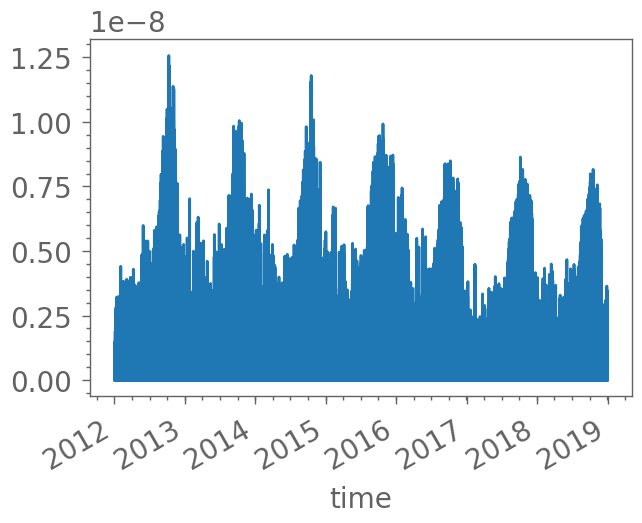

In [16]:
_ds =dic_mod_ca['ECHAM-SALSA']['SALSA_BSOA_feedback']

_ds =dic_mod_ca['NorESM'][mod2cases['NorESM'][0]]

_ds['SFisoprene'].plot()

### Save result in dictionary

In [17]:
dic_df_mod_case = di_mod2cases
for mo in models:
    cs = mod2cases[mo]
    for c in cs: 
        if len(cs)>1:
            use_name = f'{mo}_{c}'
        else:
            use_name =mo

In [18]:
dic_df_mod_case = dic_mod_ca.copy()

In [19]:
from bs_fdbck_clean.util.BSOA_datamanip import calculate_daily_median_summer,calculate_summer_median

## Rename STP values

In [20]:
for mod in models:
    for ca in mod2cases[mod]:
        _df = dic_df_mod_case[mod][ca]
        for v in ['OA','N50','N100','N200','N500']:
            if f'{v}_STP' in _df.columns:
                if v in _df.columns:
                    _df = _df.rename({v:f'{v}_orig'}, axis=1)
                _df = _df.rename({f'{v}_STP':v}, axis=1)
        dic_df_mod_case[mod][ca] = _df

### Calculate Nx-500:


In [21]:
for mod in models:
    print(mod)
    for ca in dic_df_mod_case[mod].keys():
        print(ca)
        _df = dic_df_mod_case[mod][ca]
        for v in ['N50','N100','N200']:
            _df[f'{v}-500'] = _df[v] -_df['N500'] 
        dic_df_mod_case[mod][ca] = _df

ECHAM-SALSA
SALSA_BSOA_feedback
NorESM
OsloAero_intBVOC_f09_f09_mg17_fssp
EC-Earth
ECE3_output_Sara
UKESM
AEROCOMTRAJ


## Merge with observations

In [22]:
dic_df_pre = dict()#dic_df_mod_case.copy()#deep=True)
for mod in dic_df_mod_case.keys():
    dic_df_pre[mod] = dic_df_mod_case[mod].copy()

In [23]:
vars_obs = ['OA', 'N100-500','N50-500','N200-500','temperature']

In [24]:
df_ATTO = ds_ATTO[vars_obs].drop('time_traj').to_dataframe()

df_ATTO['some_obs_missing'] = df_ATTO.isnull().any(axis=1)

In [25]:
df_for_merge = (df_ATTO[['OA','N100-500', 'some_obs_missing']]
                .rename({'OA':'obs_OA','N100-500':'obs_N100-500',},axis=1)
               )

In [26]:
for mod in dic_df_mod_case.keys():
    print(mod)
    for ca in dic_df_mod_case[mod].keys():
        dic_df_mod_case[mod][ca] = pd.merge(dic_df_pre[mod][ca], 
                                            df_for_merge ,
                                            right_on='time', 
                                            left_on='time', 
                                            how='outer')
        dic_df_mod_case[mod][ca]['year'] = dic_df_mod_case[mod][ca].index.year

ECHAM-SALSA
NorESM
EC-Earth
UKESM
Observations


In [27]:
df_ATTO_obs_rename = df_ATTO.rename({'Org':'OA','temperature':'T_C'}, axis=1)

In [28]:
df_ATTO_obs_rename.head()

OA    N100-500     N50-500    N200-500    T_C  \
time                                                                    
2014-03-10 15:00:00  0.990  259.764876  316.350342  123.407339  31.46   
2014-03-10 16:00:00  1.620  221.149397  288.441016  102.265441  31.62   
2014-03-10 17:00:00  1.660  223.659092  294.872421  104.508354  30.01   
2014-03-10 18:00:00  0.985  243.316332  323.442362  120.456843  28.18   
2014-03-10 19:00:00  2.420  236.004666  323.533283  116.970997  27.40   

                     some_obs_missing  
time                                   
2014-03-10 15:00:00             False  
2014-03-10 16:00:00             False  
2014-03-10 17:00:00             False  
2014-03-10 18:00:00             False  
2014-03-10 19:00:00             False

## Add observations to dictionary

In [29]:
dic_df_mod_case['Observations'] = dict()
dic_df_mod_case['Observations']['Observations'] = df_ATTO_obs_rename

In [30]:
dic_df_mod_case['Observations'].keys()

dict_keys(['Observations'])

In [31]:
dic_mod2case = mod2cases

In [32]:
def add_log(df, varl=None):
    if varl is None:
        varl = ['OA','N100', 'Org','N100 (cm^-3)','N50','N150','N200']
    var_exist = df.columns
    
    varl_f = set(varl).intersection(var_exist)
    print(varl_f)
    for v in varl_f:
        df[f'log10({v})'] = np.log10(df[v])
    return df


for mod in dic_df_mod_case.keys():
    for c in dic_df_mod_case[mod].keys():
    
        dic_df_mod_case[mod][c] = add_log(dic_df_mod_case[mod][c])
        #dic_dfsm_mod_case[mod][c] = add_log(dic_dfsm_mod_case[mod][c])
        
df_ATTO = add_log(df_ATTO)

{'N50', 'N100', 'OA', 'N200'}
{'N200', 'N150', 'OA', 'N100', 'N50'}
{'N200', 'N150', 'OA', 'N100', 'N50'}
{'N200', 'N150', 'OA', 'N100', 'N50'}
{'OA'}
{'OA'}


/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [33]:
mod='NorESM'

In [34]:
ca = mod2cases[mod][0]

In [35]:
mask_obs_N = dic_df_mod_case[mod][ca]['obs_N100-500'].notnull()
mask_obs_OA = dic_df_mod_case[mod][ca]['obs_OA'].notnull()

## Compute daily medians:

Save daily medians for usage in next notebook. 

In [36]:
path_save_daily_medians = Path(f'Temp_data/{select_station}_daily_medians')
path_save_daily_medians.parent.mkdir(exist_ok=True)

In [37]:
path_save_daily_medians

PosixPath('Temp_data/ATTO_daily_medians')

## Preprocess data: remove days with few datapoints

In [38]:
minimal_number_per_day = 16
obs_per_day =  dic_df_mod_case['Observations']['Observations'].resample('D').count()['OA']
obs_per_day

time
2014-03-10     9
2014-03-11    24
2014-03-12    24
2014-03-13    24
2014-03-14    24
              ..
2019-01-24     0
2019-01-25     0
2019-01-26     0
2019-01-27     0
2019-01-28     0
Freq: D, Name: OA, Length: 1786, dtype: int64

In [39]:
print(f'Datapoints with limit: {(obs_per_day>minimal_number_per_day).sum()},'
      f'datapoints without:{(obs_per_day>1).sum()}')

Datapoints with limit: 539,datapoints without:663


In [40]:
(obs_per_day>1).sum()

663

<AxesSubplot:xlabel='time'>

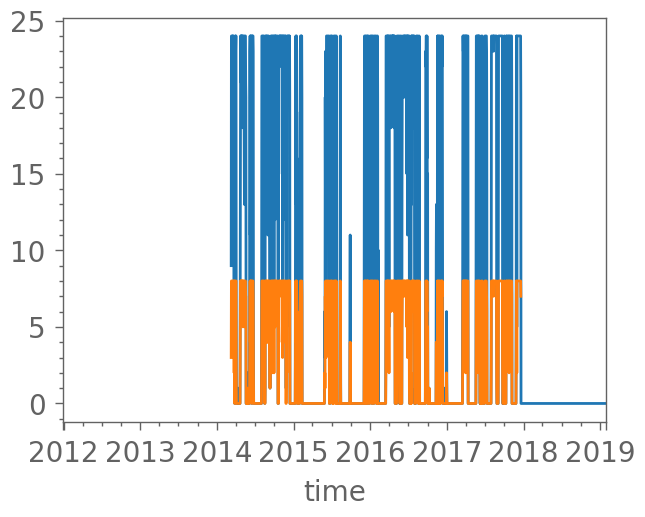

In [41]:
_df = dic_df_mod_case['UKESM']['AEROCOMTRAJ']
_df_m = _df.resample('d').median()
_df_m['obs_per_day'] = obs_per_day

_df_m['obs_per_day'].plot()

_df_c = _df[_df['some_obs_missing']==False].resample('d').count()['OA']
_df_c.plot()

#### Write to file: 

In [42]:
dic_df_med = dict()
for mo in dic_df_mod_case.keys():
    for ca in dic_df_mod_case[mo].keys():
        print(mo)
        if len(dic_df_mod_case[mo].keys())>1:
            use_name = f'{mo}_{ca}'
        else:
            use_name = mo
            
        _df = dic_df_mod_case[mo][ca]
        

        _df = _df[_df['some_obs_missing']==False]
        _df_med = _df.resample('D').median()
        _df_med['obs_per_day'] = obs_per_day
        #_df_count = _df.resample('D').count()['OA']
        dic_df_med[use_name] = _df_med.copy()[_df_med['obs_per_day']>minimal_number_per_day]
        fp = path_save_daily_medians.parent / f'{path_save_daily_medians.name}_{use_name}.csv'
        dic_df_med[use_name].to_csv(fp)
        print(fp)

ECHAM-SALSA
Temp_data/ATTO_daily_medians_ECHAM-SALSA.csv
NorESM
Temp_data/ATTO_daily_medians_NorESM.csv
EC-Earth
Temp_data/ATTO_daily_medians_EC-Earth.csv
UKESM
Temp_data/ATTO_daily_medians_UKESM.csv
Observations
Temp_data/ATTO_daily_medians_Observations.csv


In [43]:
from bs_fdbck_clean.util.plot.BSOA_plots import cdic_model
import seaborn as sns
from matplotlib import pyplot as plt, gridspec as gridspec
from bs_fdbck_clean.util.plot.BSOA_plots import make_cool_grid2, make_cool_grid3
import scipy

### Fit funcs

In [44]:
from bs_fdbck_clean.util.BSOA_datamanip.fits import *
from bs_fdbck_clean.util.BSOA_datamanip.atto import season2month

### season to monthseason2month

In [45]:
def select_months(df, season = None, month_list=None):
    if season is not None: 
        month_list = season2month[season]
    

    df['month'] = df.index.month
    return df['month'].isin(month_list)

In [46]:
from bs_fdbck_clean.util.plot.BSOA_plots import cdic_model

## Functions for plotting

In [47]:
models_and_obs =  models + ['Observations'] 

In [48]:
label_dic =dict(
    T_C=r'T  [$^\circ$C]',
    OA =r'OA [$\mu g m^{-3}$]',
)

## Define grid

In [49]:

def make_cool_grid5(figsize=None,
                    width_ratios=None,
                    ncols=1,
                    nrows=1,
                    num_subplots_per_big_plot=2,
                    size_big_plot=5,
                    add_gs_kw=None,
                    sharex='col',
                    sharey='row',
                    
                    w_plot = 5.,
                    w_cbar = 1,
                    w_ratio_sideplot = 0.6,
                    frac_dist_axis_from_big = .15
                    ):
    width_small_plot = size_big_plot/num_subplots_per_big_plot
    width_dist_ax = size_big_plot*frac_dist_axis_from_big
    
    if figsize is None:
        
        figsize = [size_big_plot + width_small_plot+ width_dist_ax,
                   size_big_plot + width_small_plot+ width_dist_ax,
                  ]
    #figsize=[10,10]
    width_ratios = None
    add_gs_kw = None

    if width_ratios is None:
        width_ratios = [1] * ncols + [w_cbar / w_plot] #+ [1]* ncols_extra
    if add_gs_kw is None:
        add_gs_kw = dict()


    if 'hspace' not in add_gs_kw.keys():
        add_gs_kw['hspace'] = 0
    if 'wspace' not in add_gs_kw.keys():
        add_gs_kw['wspace'] = 0


    # add_gs_kw['width_ratios'] = width_ratios
    fig = plt.figure(figsize=figsize,
                     dpi=100)

    #gs = fig.add_gridspec(nrows, ncols, **add_gs_kw)

    
    w_r1 = [size_big_plot,size_big_plot*frac_dist_axis_from_big]
    h_r1 = [frac_dist_axis_from_big,1, ]
    
    gs0 = gridspec.GridSpec(2, 2, figure=fig, height_ratios= [size_big_plot+width_dist_ax,width_small_plot],
                            width_ratios = [size_big_plot+width_dist_ax,width_small_plot])
    #fig.show()
    
    gs00 = gridspec.GridSpecFromSubplotSpec(nrows+1, ncols+1, width_ratios=w_r1, height_ratios=h_r1, subplot_spec=gs0[0,0], **add_gs_kw)
    # for the small plots:
    gs01 = gridspec.GridSpecFromSubplotSpec(num_subplots_per_big_plot+1,1, subplot_spec=gs0[:,1])#, **add_gs_kw)
    gs03 = gridspec.GridSpecFromSubplotSpec(1,num_subplots_per_big_plot, subplot_spec=gs0[1,:1])#, **add_gs_kw)

    # gs_s = gs[:,:(ncols+1)].subgridspec(nrows=nrows, ncols=ncols, wspace=add_gs_kw['wspace'], hspace=add_gs_kw['hspace'])
    axs = gs00.subplots(sharex=sharex, sharey=sharey, )
    axs_extra = gs01.subplots(sharex=sharex, sharey=sharey, )
    axs_extra2 = gs03.subplots(sharex=sharex, sharey=sharey, )
    axs_extra = np.concatenate((axs_extra, axs_extra2,))
    axs[0,1].clear()
    axs[0,1].axis("off")
    daxs = dict(x=axs[0,0],y=axs[1,1])
    # distribution axis
    for a in daxs:
        _ax = daxs[a]
        sns.despine(bottom=False, left=False, ax=_ax)
        _ax.axis("off")
    #daxs = [dax1,dax2]
    #axs = np.array(axs)

    ax = axs[1,0]


    return fig, ax, daxs, axs_extra





In [50]:

def compute_p_value(df_s, out, popt):
    parameters = popt
    parameterStatistics = out#myodr.run()    
    x = df_s.dropna()
    df_e = len(x) - len(popt) # degrees of freedom, error
    cov_beta = parameterStatistics.cov_beta # parameter covariance matrix from ODR
    sd_beta = parameterStatistics.sd_beta * parameterStatistics.sd_beta
    ci = []
    t_df = scipy.stats.t.ppf(0.975, df_e)
    ci = []
    for i in range(len(parameters)):
        ci.append([parameters[i] - t_df * parameterStatistics.sd_beta[i], parameters[i] + t_df * parameterStatistics.sd_beta[i]])

    tstat_beta = parameters / parameterStatistics.sd_beta # coeff t-statistics
    pstat_beta = (1.0 - scipy.stats.t.cdf(np.abs(tstat_beta), df_e)) * 2.0    # coef. p-values

    for i in range(len(parameters)):
        print('parameter:', parameters[i])
        print('   conf interval:', ci[i][0], ci[i][1])
        print('   tstat:', tstat_beta[i])
        print('   pstat:', pstat_beta[i])
        print()

#### Make T to OA plot

In [51]:
def make_plot(v_x, v_y, xlims, ylims, season, 
              xlab=None, ylab=None, alpha_scat=.3,
             source_list = models_and_obs, fig=None, ax=None, daxs=None, axs_extra=None,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
              markersize=1,
              marker='.',

             ):
    if fig is None: 
        fig, ax, daxs, axs_extra = make_cool_grid3(ncols_extra=2, nrows_extra=3,)# w_ratio_sideplot=.5)

    if xlab is None: 
        if xlab in label_dic:
            xlab = label_dic[v_x]
    if ylab is None: 
        if ylab in label_dic:
            ylab = label_dic[v_y]

    make_scatter_plot(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=alpha_scat,
             source_list = source_list, fig=fig, ax=ax, daxs=daxs, axs_extra=axs_extra,
              xscale=xscale, yscale=yscale,
              dic_df_med = dic_df_med,
              markersize=markersize,
              marker=marker,)
        
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    fig.suptitle(f'ATTO, {season} season, 2012-2018', y=.95)
    xlim_dist = list(daxs['y'].get_xlim())
    for mo in source_list:

        df_s =  dic_df_med[mo]

        mask_months = select_months(df_s, season=season)
        df_s = df_s[mask_months].copy()
        if xscale=='log':
            xbins = np.logspace(np.log10(xlims[0]),np.log10(xlims[1]),20)
        else:
            xbins = np.linspace(xlims[0],xlims[1],20)
            
        if yscale=='log':
            ybins = np.logspace(np.log10(ylims[0]),np.log10(ylims[1]),20)
        else:
            ybins = np.linspace(ylims[0],ylims[1],20)
            

        sns.histplot(#x=v_x,
                    x= df_s[v_x], 
            edgecolor=cdic_model[mo],
            #log_scale=(xscale=='log'),
            color=cdic_model[mo], 
            element="step",
            label=mo,
            linewidth=1,
            #log_scale=(xscale=='log',False,),

            alpha=.1,
            bins=xbins,
            ax = daxs['x'],
                    
                   )
        print(daxs['x'].get_ylim())
        _fi, ax_test = plt.subplots();
        ax_test = sns.histplot(#x=v_x,
            y=df_s[v_y],
            color=cdic_model[mo], 
            element="step",
            label=mo,
            ax = ax_test,
            #ax = daxs['y'],
            linewidth=2,
            
            #edgecolor=None,
            #log_scale=(False,yscale=='log'),
            alpha=.1,
            bins=ybins,
        );
        
        sns.histplot(#x=v_x,
            y=df_s[v_y],
            color=cdic_model[mo], 
            element="step",
            label=mo,
            ax = daxs['y'],
            linewidth=1,
            
            #edgecolor=None,
            #log_scale=(xscale=='log',yscale=='log'),
            #log_scale=(False,yscale=='log'),
            
            alpha=.1,
            bins=ybins,
            )
        xlim_dist_n = list(ax_test.get_xlim())
        _fi.clf()
        #if xlim_dist_n[1]>xlim_dist_n[1]:
        xlim_dist[1] = max(xlim_dist_n[1],xlim_dist[1])
        #daxs['y'].set_xlim([0,xlim_dist[1]])
        
        #plt.show()

    ax.set_ylim(ylims)
    ax.set_xlim(xlims)


    for ax_e in axs_extra:
        ax_e.set_xlabel('')
        ax_e.set_ylabel('')
        ax_e.set_ylim(ax.get_ylim())
        ax_e.set_xlim(ax.get_xlim())
        ax_e.axes.xaxis.set_ticklabels([])
        ax_e.axes.yaxis.set_ticklabels([])

        sns.despine(ax = ax_e)

    return

def make_scatter_plot(v_x, v_y, xlims, ylims, season, 
              xlab=None, ylab=None, alpha_scat=.3,
             source_list = models_and_obs, fig=None, ax=None, daxs=None, axs_extra=None,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
              markersize=1,
              marker='.',):
    
    for mo, ax_ex in zip(source_list, axs_extra[:]):
        df_s =  dic_df_med[mo]

        mask_months = select_months(df_s, season=season)
        df_s = df_s[mask_months].copy()


        sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt*.7, 
                    label='__nolegend__',
                    ax = ax,
                    #facecolor='none',
                    edgecolor=cdic_model[mo],
                        marker=marker,
                        s=markersize,

                   )
        sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt+.1, 
                    label='__nolegend__',
                    ax = ax_ex,
                    #facecolor='none',
                    edgecolor=cdic_model[mo],
                        marker=marker,
                        s=markersize,
                    
                   )
        ax_ex.set_title(mo, y=.95)
    return
#### WET_mid

### Fit: T to OA, exp

In [52]:
def get_lin_log_fit(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12]):
    v_log_y = f'ln({v_y})'
    df_s[v_log_y] = np.log(df_s[v_y])
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_log_y, fit_func = 'linear', return_func=True, beta0=beta0)
    print('****ignore****')
    _, _, _, func = get_odr_fit_and_labs(df_s, v_x, v_log_y, fit_func = 'exp', return_func=True, beta0=beta0, pprint=False)
    print('****stop ignore****')
    
    a = np.exp(popt[-1])
    b = popt[0]
    if np.abs(a)< 0.009:
        #a_lab = ((str("%.2e" % a)).replace("e", ' \\cdot 10^{ ')).replace("+0", ") + ' } ')
        label = '($%.1E) \cdot e^{%5.2fx}$' %(a,b,)
    else:
        label = '$%5.2f e^{%5.2fx}$' %(a,b,)
    popt = [a,b]

    return popt, pov, label, func

## T to OA: Various seasons

### FMA

(0.0, 25.2)
(0.0, 32.55)
(0.0, 32.55)
(0.0, 32.55)
(0.0, 32.55)
*******ECHAM-SALSA*****
[0.01, 0.12]
Beta: [ 0.20458295 -5.46657983]
Beta Std Error: [0.02459658 0.70165108]
Beta Covariance: [[ 0.00109396 -0.03103647]
 [-0.03103647  0.89021129]]
Residual Variance: 0.553030771613535
Inverse Condition #: 0.03185412984652145
Reason(s) for Halting:
  Sum of squares convergence
[ 0.20458295 -5.46657983]
reason for halting
****ignore****
[0.01, 0.12]
[0.00048249 0.22545849]
reason for halting
****stop ignore****
*******NorESM*****
[0.01, 0.12]
Beta: [ 0.33380066 -6.77676962]
Beta Std Error: [0.02958141 0.74289995]
Beta Covariance: [[ 0.00255154 -0.06398387]
 [-0.06398387  1.60925461]]
Residual Variance: 0.3429540168416315
Inverse Condition #: 0.017891521155053446
Reason(s) for Halting:
  Sum of squares convergence
[ 0.33380066 -6.77676962]
reason for halting
****ignore****
[0.01, 0.12]
[0.01667153 0.18073625]
reason for halting
****stop ignore****
*******EC-Earth*****
[0.01, 0.12]
Beta: [ 0.2

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


*******ECHAM-SALSA*****
[0.01, 0.12]
Beta: [  0.46705999 -11.7520523 ]
Beta Std Error: [0.05773683 1.51623353]
Beta Covariance: [[ 0.0103259  -0.2709571 ]
 [-0.2709571   7.12121604]]
Residual Variance: 0.322833082293913
Inverse Condition #: 0.012568929269427716
Reason(s) for Halting:
  Sum of squares convergence
[  0.46705999 -11.7520523 ]
reason for halting
****ignore****
[0.01, 0.12]
[2.19338668e-13 1.06736664e+00]
reason for halting
****stop ignore****
*******NorESM*****
[0.01, 0.12]
Beta: [ 0.35989763 -7.38349125]
Beta Std Error: [0.05392981 1.33280844]
Beta Covariance: [[ 0.0065771  -0.16238767]
 [-0.16238767  4.01709253]]
Residual Variance: 0.44220498519718826
Inverse Condition #: 0.01457499323520074
Reason(s) for Halting:
  Sum of squares convergence
[ 0.35989763 -7.38349125]
reason for halting
****ignore****
[0.01, 0.12]
[0.00596578 0.22292163]
reason for halting
****stop ignore****
*******EC-Earth*****
[0.01, 0.12]
Beta: [ 0.23654685 -5.26764158]
Beta Std Error: [0.02598424 0.

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


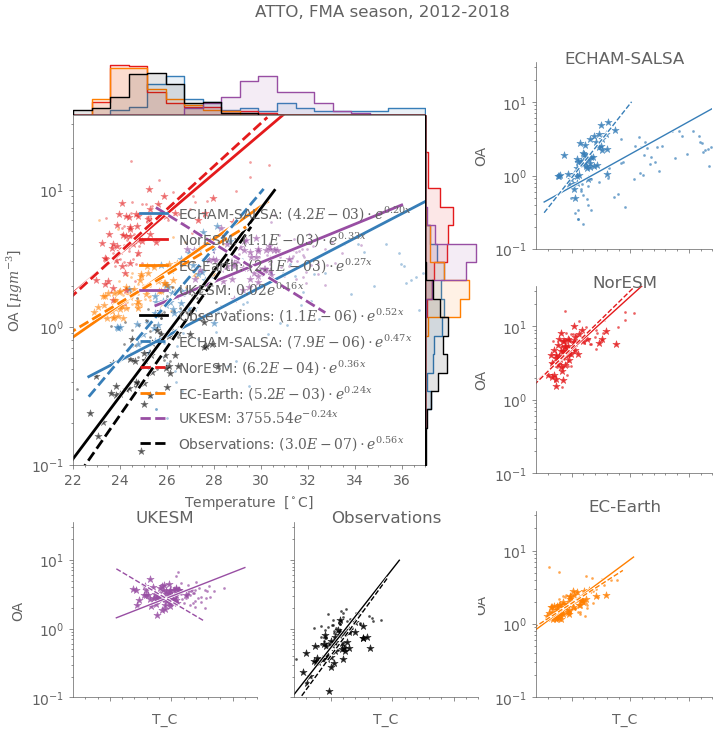

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [53]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'Temperature  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,37]
ylims = [.1,35]


season='FMA'
v_x = 'T_C'
v_y = 'OA'

dic_df_med_adj = dict()

for k in dic_df_med.keys():
    _df  = dic_df_med[k].copy()
    _df = _df[~_df.index.year.isin([2015,2016])]
    dic_df_med_adj[k] = _df

make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .2, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='log',
          dic_df_med = dic_df_med,
          markersize=10,
         
         )
make_scatter_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .2, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='log',
          dic_df_med = dic_df_med_adj,
          markersize=30,
                  marker='*',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(f'*******{mo}*****')
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    #popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    #popt, pov, label, func = get_least_square_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    popt, pov, label, func = get_lin_log_fit(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')
for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med_adj[mo]
    print(f'*******{mo}*****')
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    #popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    #popt, pov, label, func = get_least_square_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    popt, pov, label, func = get_lin_log_fit(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linestyle= '--',linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt),linestyle= '--', c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')


    
fn = make_fn_scat(f'exp1_no2015-2016_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

### FMAM

(0.0, 39.9)
(0.0, 46.2)
(0.0, 49.35)
(0.0, 49.35)
(0.0, 49.35)
*******ECHAM-SALSA*****
[0.01, 0.12]
Beta: [ 0.24754775 -6.58478989]
Beta Std Error: [0.02583127 0.71747132]
Beta Covariance: [[ 0.00114624 -0.03169117]
 [-0.03169117  0.88429001]]
Residual Variance: 0.5821224711008499
Inverse Condition #: 0.029721036645533643
Reason(s) for Halting:
  Sum of squares convergence
[ 0.24754775 -6.58478989]
reason for halting
****ignore****
[0.01, 0.12]
[0.00068214 0.21281449]
reason for halting
****stop ignore****
*******NorESM*****
[0.01, 0.12]
Beta: [ 0.33068869 -6.66221326]
Beta Std Error: [0.02463281 0.62321766]
Beta Covariance: [[ 0.00175741 -0.04439355]
 [-0.04439355  1.12492746]]
Residual Variance: 0.34526693344327575
Inverse Condition #: 0.01829994423107943
Reason(s) for Halting:
  Sum of squares convergence
[ 0.33068869 -6.66221326]
reason for halting
****ignore****
[0.01, 0.12]
[0.01967841 0.17516209]
reason for halting
****stop ignore****
*******EC-Earth*****
[0.01, 0.12]
Beta: [ 0.

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


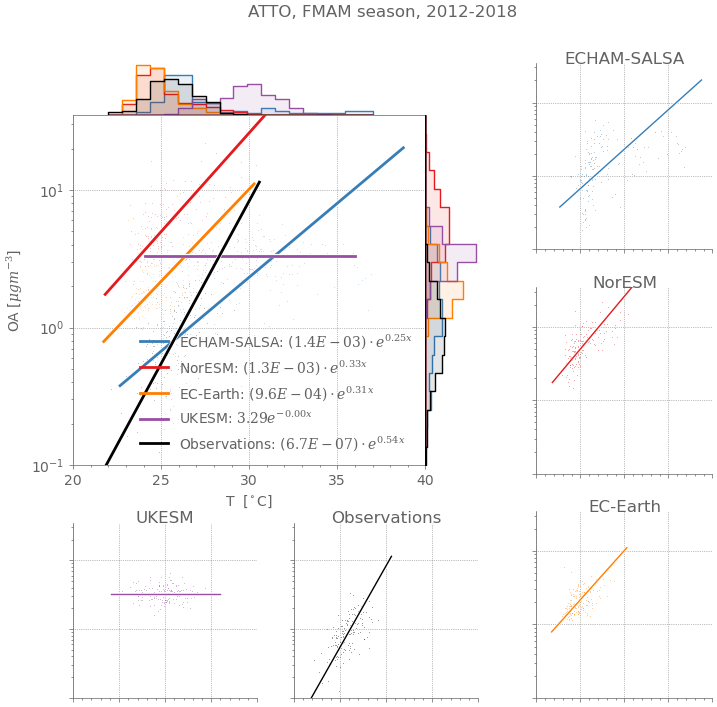

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [54]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,37]
ylims = [.1,35]


season='FMAM'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='log',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(f'*******{mo}*****')
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    #popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    #popt, pov, label, func = get_least_square_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    popt, pov, label, func = get_lin_log_fit(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')

ax.set_xticks(np.arange(20,41,5))
ax.grid(color='grey', linewidth=.5, linestyle=':')

for ax_ex in axs_extra.flatten():
    ax_ex.set_yticklabels([])
    ax_ex.set_xticks(np.arange(20,41,5))
    ax_ex.grid(color='grey', linewidth=.5, linestyle=':')

    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

### MAM

(0.0, 39.9)
(0.0, 42.0)
(0.0, 48.3)
(0.0, 48.3)
(0.0, 48.3)
ECHAM-SALSA
[0.01, 0.12]
Beta: [ 0.26603205 -7.047792  ]
Beta Std Error: [0.03062146 0.83823273]
Beta Covariance: [[ 0.00150272 -0.04096822]
 [-0.04096822  1.12604622]]
Residual Variance: 0.6239833736402609
Inverse Condition #: 0.028231287900884392
Reason(s) for Halting:
  Sum of squares convergence
[ 0.26603205 -7.047792  ]
reason for halting
****ignore****
[0.01, 0.12]
[0.00080997 0.20266588]
reason for halting
****stop ignore****
NorESM
[0.01, 0.12]
Beta: [ 0.35342131 -7.23499635]
Beta Std Error: [0.02886946 0.72610384]
Beta Covariance: [[ 0.00224746 -0.05645424]
 [-0.05645424  1.42171147]]
Residual Variance: 0.3708395149491108
Inverse Condition #: 0.01658623946273501
Reason(s) for Halting:
  Sum of squares convergence
[ 0.35342131 -7.23499635]
reason for halting
****ignore****
[0.01, 0.12]
[0.01195806 0.1948102 ]
reason for halting
****stop ignore****
EC-Earth
[0.01, 0.12]
Beta: [ 0.33697548 -7.63955279]
Beta Std Error: [0

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


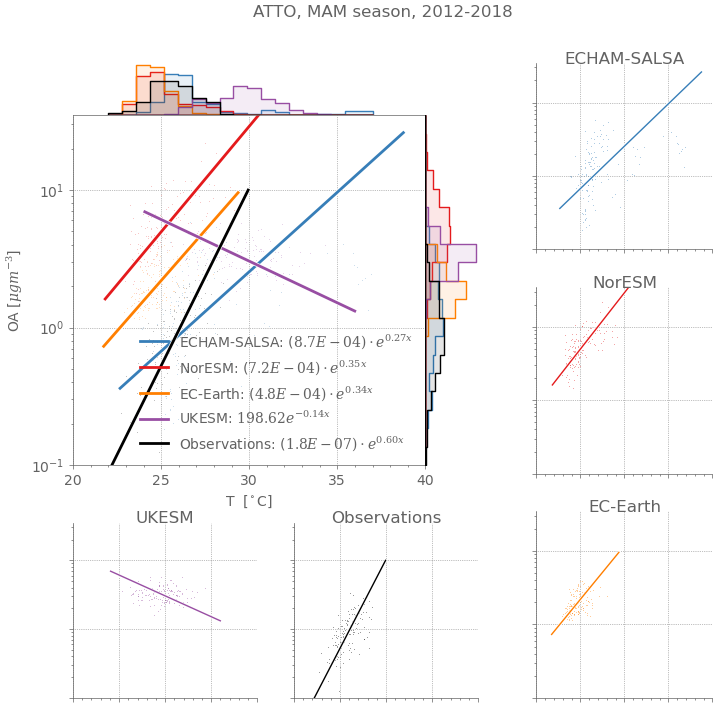

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [55]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,37]
ylims = [.1,35]


season='MAM'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='log',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    #popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    #popt, pov, label, func = get_least_square_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    popt, pov, label, func = get_lin_log_fit(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')

ax.set_xticks(np.arange(20,41,5))
ax.grid(color='grey', linewidth=.5, linestyle=':')

for ax_ex in axs_extra.flatten():
    ax_ex.set_yticklabels([])
    ax_ex.set_xticks(np.arange(20,41,5))
    ax_ex.grid(color='grey', linewidth=.5, linestyle=':')

    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

### JFM

(0.0, 13.65)
(0.0, 28.35)
(0.0, 28.35)
(0.0, 28.35)
(0.0, 28.35)
ECHAM-SALSA
[0.01, 0.12]
Beta: [ 0.13642243 -3.39237162]
Beta Std Error: [0.01509486 0.47415453]
Beta Covariance: [[ 0.00055434 -0.01729637]
 [-0.01729637  0.54695868]]
Residual Variance: 0.41104113246981705
Inverse Condition #: 0.032931157232786605
Reason(s) for Halting:
  Sum of squares convergence
[ 0.13642243 -3.39237162]
reason for halting
****ignore****
[0.01, 0.12]
[0.00300193 0.1758615 ]
reason for halting
****stop ignore****
NorESM
[0.01, 0.12]
Beta: [ 0.32794981 -6.49654162]
Beta Std Error: [0.02939417 0.76289504]
Beta Covariance: [[ 0.00298246 -0.07723368]
 [-0.07723368  2.00900986]]
Residual Variance: 0.28969934274713205
Inverse Condition #: 0.021579349966300895
Reason(s) for Halting:
  Sum of squares convergence
[ 0.32794981 -6.49654162]
reason for halting
****ignore****
[0.01, 0.12]
[0.03686785 0.15285595]
reason for halting
****stop ignore****
EC-Earth
[0.01, 0.12]
Beta: [ 0.11974046 -2.40106594]
Beta Std E

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[1.30829677e-14 1.09932622e+00]
reason for halting
****stop ignore****


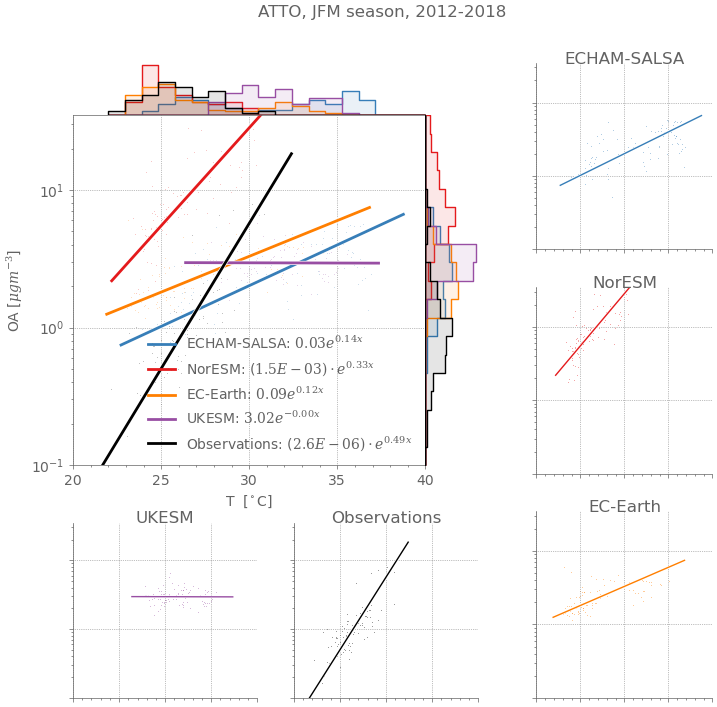

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [56]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,40]
ylims = [.1,35]


season='JFM'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='log',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    #popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    #popt, pov, label, func = get_least_square_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    popt, pov, label, func = get_lin_log_fit(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')

ax.set_xticks(np.arange(20,41,5))
ax.grid(color='grey', linewidth=.5, linestyle=':')

for ax_ex in axs_extra.flatten():
    ax_ex.set_yticklabels([])
    ax_ex.set_xticks(np.arange(20,41,5))
    ax_ex.grid(color='grey', linewidth=.5, linestyle=':')

    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

### MAM

(0.0, 39.9)
(0.0, 42.0)
(0.0, 48.3)
(0.0, 48.3)
(0.0, 48.3)
ECHAM-SALSA
[0.01, 0.12]
Beta: [ 0.26603205 -7.047792  ]
Beta Std Error: [0.03062146 0.83823273]
Beta Covariance: [[ 0.00150272 -0.04096822]
 [-0.04096822  1.12604622]]
Residual Variance: 0.6239833736402609
Inverse Condition #: 0.028231287900884392
Reason(s) for Halting:
  Sum of squares convergence
[ 0.26603205 -7.047792  ]
reason for halting
****ignore****
[0.01, 0.12]
[0.00080997 0.20266588]
reason for halting
****stop ignore****
NorESM
[0.01, 0.12]
Beta: [ 0.35342131 -7.23499635]
Beta Std Error: [0.02886946 0.72610384]
Beta Covariance: [[ 0.00224746 -0.05645424]
 [-0.05645424  1.42171147]]
Residual Variance: 0.3708395149491108
Inverse Condition #: 0.01658623946273501
Reason(s) for Halting:
  Sum of squares convergence
[ 0.35342131 -7.23499635]
reason for halting
****ignore****
[0.01, 0.12]
[0.01195806 0.1948102 ]
reason for halting
****stop ignore****
EC-Earth
[0.01, 0.12]
Beta: [ 0.33697548 -7.63955279]
Beta Std Error: [0

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


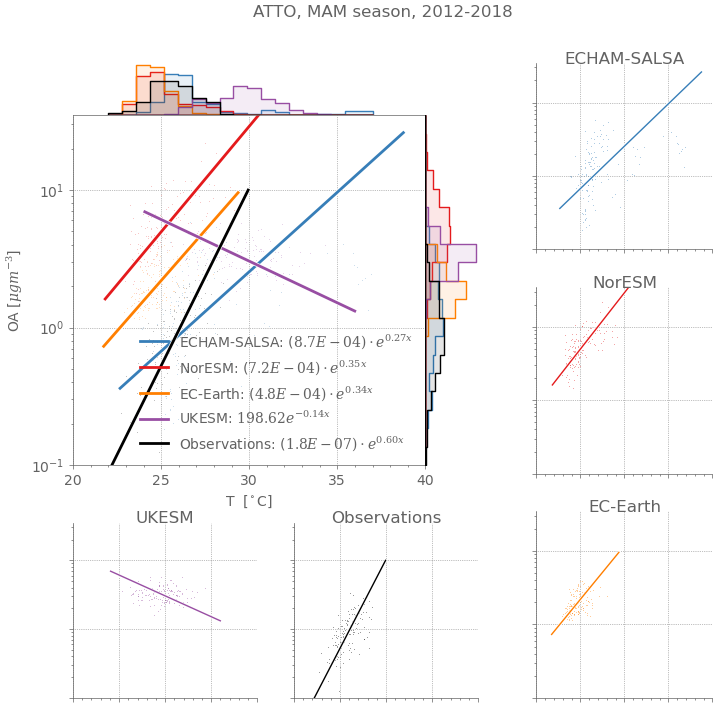

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [57]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,37]
ylims = [.1,35]


season='MAM'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='log',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    #popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    #popt, pov, label, func = get_least_square_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    popt, pov, label, func = get_lin_log_fit(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')
ax.set_xticks(np.arange(20,41,5))
ax.grid(color='grey', linewidth=.5, linestyle=':')

for ax_ex in axs_extra.flatten():
    ax_ex.set_yticklabels([])
    ax_ex.set_xticks(np.arange(20,41,5))
    ax_ex.grid(color='grey', linewidth=.5, linestyle=':')


    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

ECHAM-SALSA
Going for least square
NorESM
Going for least square
EC-Earth
Going for least square
UKESM
Going for least square
Observations
Going for least square
Plots/ATTO/scat_all_years_echam_noresm_residual_exp_MAM_ATTO_T_C_OA-ATTO_ukesm_lev-2.png


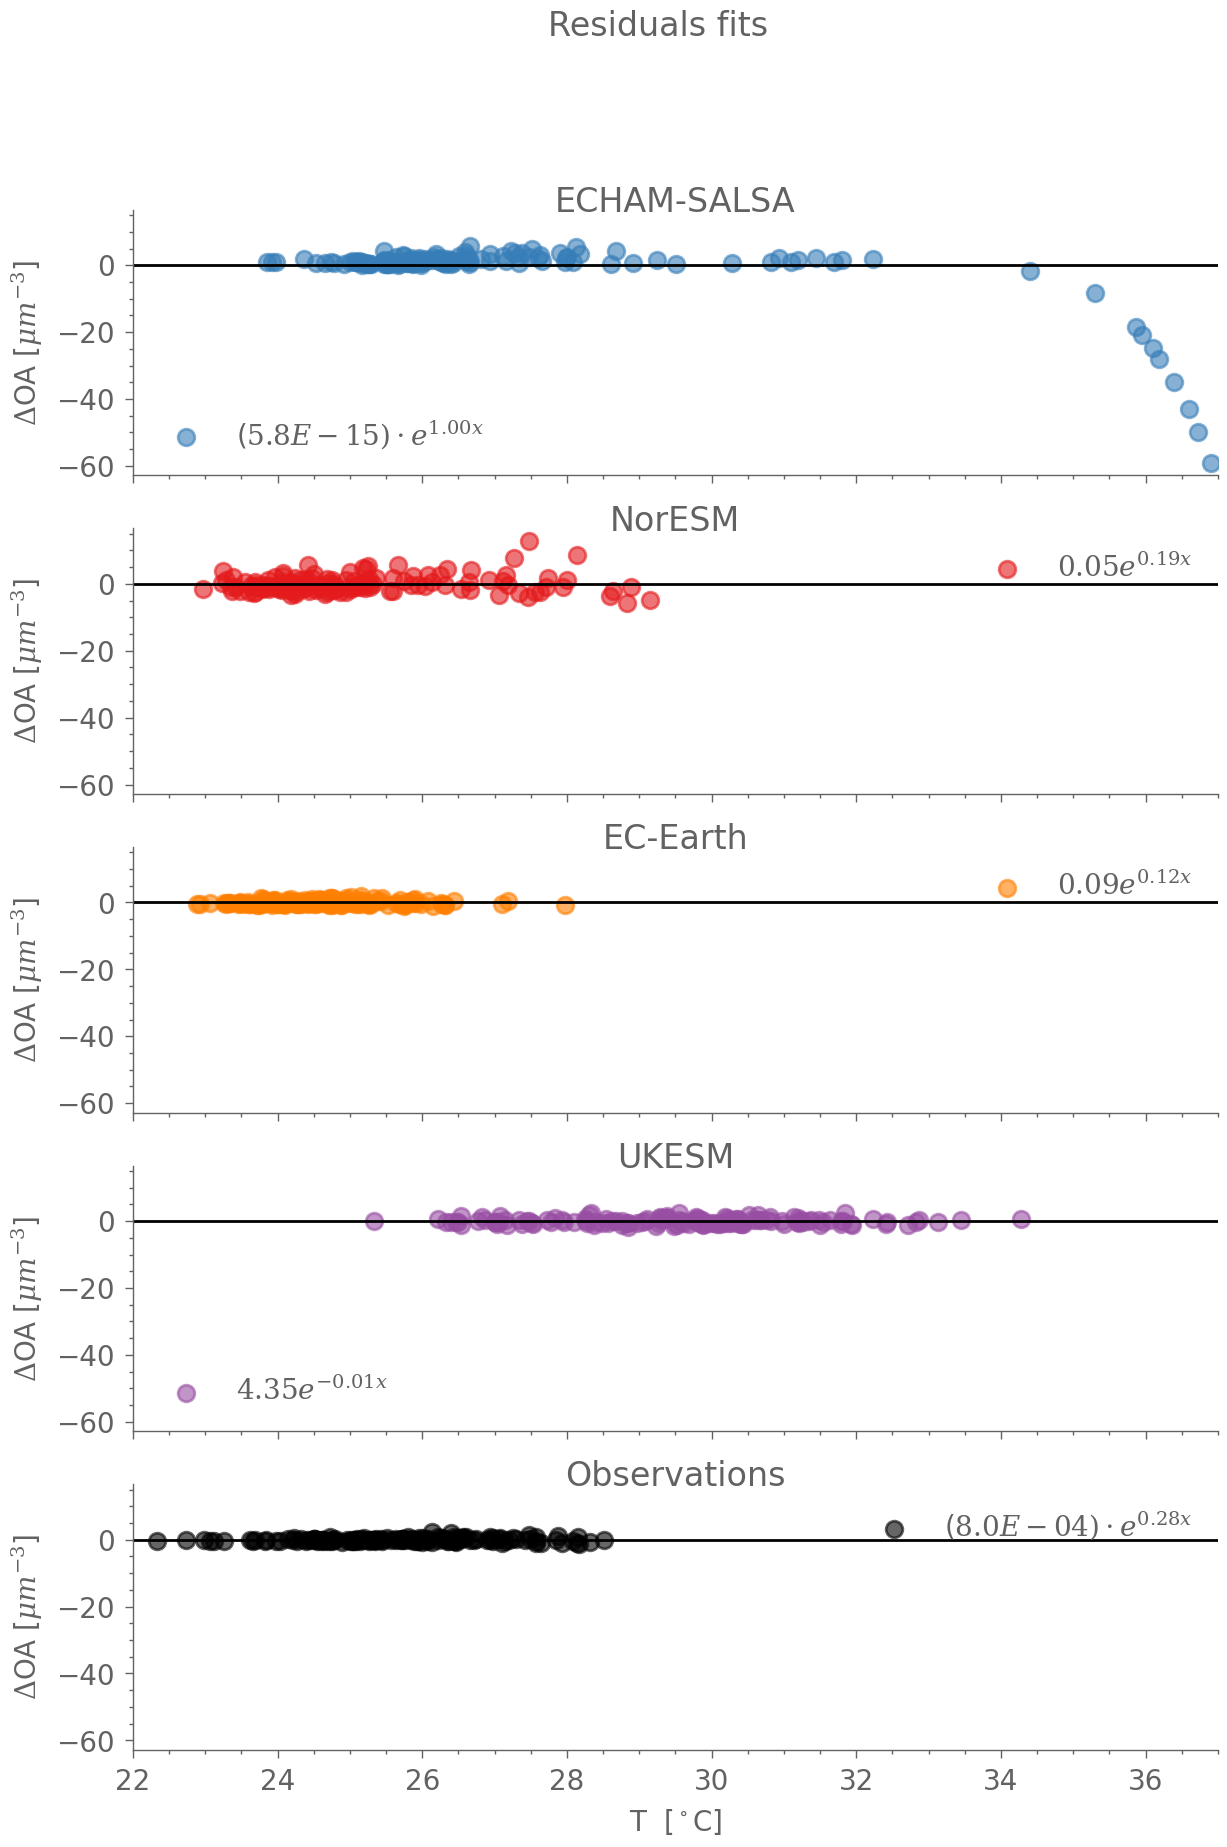

In [58]:
## Settings
alpha_scatt = 0.5

figsize=[7,10]
xlab = r'T  [$^\circ$C]'
ylab = r'$\Delta$OA [$\mu m^{-3}$]'


#ylims = [1,700]

# OBS: 
v_y = 'OA'
v_x = 'T_C'

season = 'MAM'
xscale='linear'
yscale='linear'

fig, axs = plt.subplots(len(models_and_obs), sharex=True, sharey= True, figsize=figsize)

## Settings
alpha_scatt = 0.6


for mo, ax in zip(models_and_obs, axs):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    
    #popt, pov, label, func, out = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True, return_out_obj=True)
    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func = get_least_square_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True)

    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    ax.scatter(df_s[v_x],df_s[v_y]-func(df_s[v_x],*popt),
                                    color=cdic_model[mo], 
                #alpha=alpha_scatt, 
                #facecolor='none',
               alpha=alpha_scatt,
               
                edgecolor=cdic_model[mo],

                label=label
                   )
    _xlim = [_mi*.95, _ma*1.05]
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


    ax.hlines(0, xmin=xlims[0],xmax=xlims[1], color='k', linewidth=1)
    ax.legend(frameon=False)
    ax.set_ylabel(ylab)
    ax.set_title(mo, y=.93)
    ax.set_xlim(xlims)

        
#fig.suptitle('Observations')
axs[-1].set_xlabel(xlab)
fig.suptitle(r'Residuals fits')

sns.despine(fig)    
    
fn = make_fn_scat(f'residual_exp_{season}_{select_station}', v_x, v_y)
ax.legend(frameon=False)
#fig.savefig(fn, dpi=150)
#fig.savefig(fn.with_suffix('.pdf'), dpi=150)
print(fn)

### JFM

(0.0, 47.25)
(0.0, 53.55)
(0.0, 60.9)
(0.0, 60.9)
(0.0, 60.9)
ECHAM-SALSA
[0.01, 0.12]
Beta: [0.00077194 0.27437678]
Beta Std Error: [0.00089416 0.04080276]
Beta Covariance: [[ 1.14790821e-06 -5.22410400e-05]
 [-5.22410400e-05  2.39031230e-03]]
Residual Variance: 0.6965053306737456
Inverse Condition #: 0.015495248529860313
Reason(s) for Halting:
  Sum of squares convergence
[0.00077194 0.27437678]
reason for halting
NorESM
[0.01, 0.12]
Beta: [0.00155342 0.32401861]
Beta Std Error: [0.00109684 0.02741637]
Beta Covariance: [[ 3.43813203e-06 -8.58184084e-05]
 [-8.58184084e-05  2.14810857e-03]]
Residual Variance: 0.34991596740908015
Inverse Condition #: 0.017462088996056755
Reason(s) for Halting:
  Sum of squares convergence
[0.00155342 0.32401861]
reason for halting
EC-Earth
[0.01, 0.12]
Beta: [1.32628367e-04 3.89588225e-01]
Beta Std Error: [0.00014995 0.0455515 ]
Beta Covariance: [[ 3.77086557e-08 -1.14506198e-05]
 [-1.14506198e-05  3.47997744e-03]]
Residual Variance: 0.5962506271363723


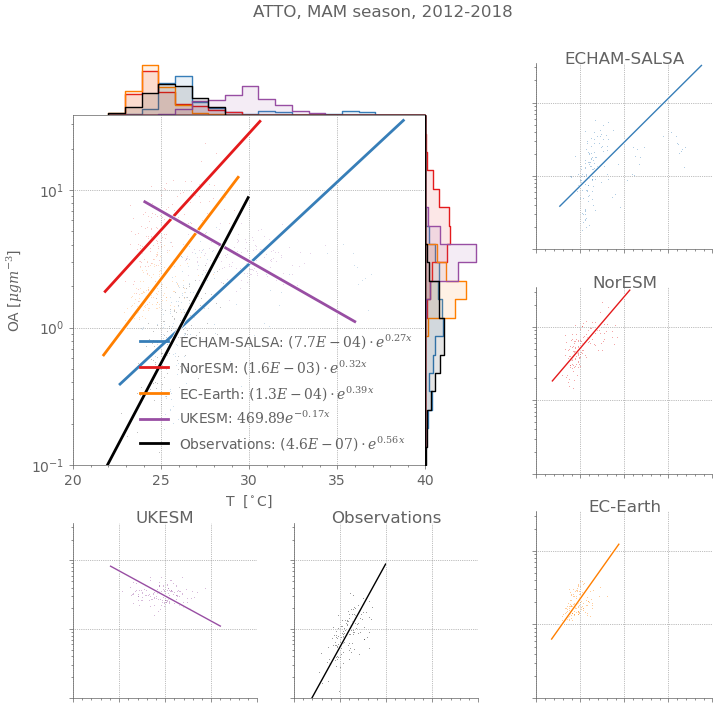

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [59]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,40]
ylims = [.1,35]


season='MAM'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='log',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    #popt, pov, label, func = get_least_square_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])

    ax_ex.set_ylim(ylims)
    ax_ex.set_xlim(xlims)

    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')

ax.set_xticks(np.arange(20,41,5))
ax.grid(color='grey', linewidth=.5, linestyle=':')

for ax_ex in axs_extra.flatten():
    ax_ex.set_yticklabels([])
    ax_ex.set_xticks(np.arange(20,41,5))
    ax_ex.grid(color='grey', linewidth=.5, linestyle=':')


    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

ECHAM-SALSA
Going for least square
NorESM
Going for least square
EC-Earth
Going for least square
UKESM
Going for least square
Observations
Going for least square
Plots/ATTO/scat_all_years_echam_noresm_residual_exp_JFM_ATTO_T_C_OA-ATTO_ukesm_lev-2.png


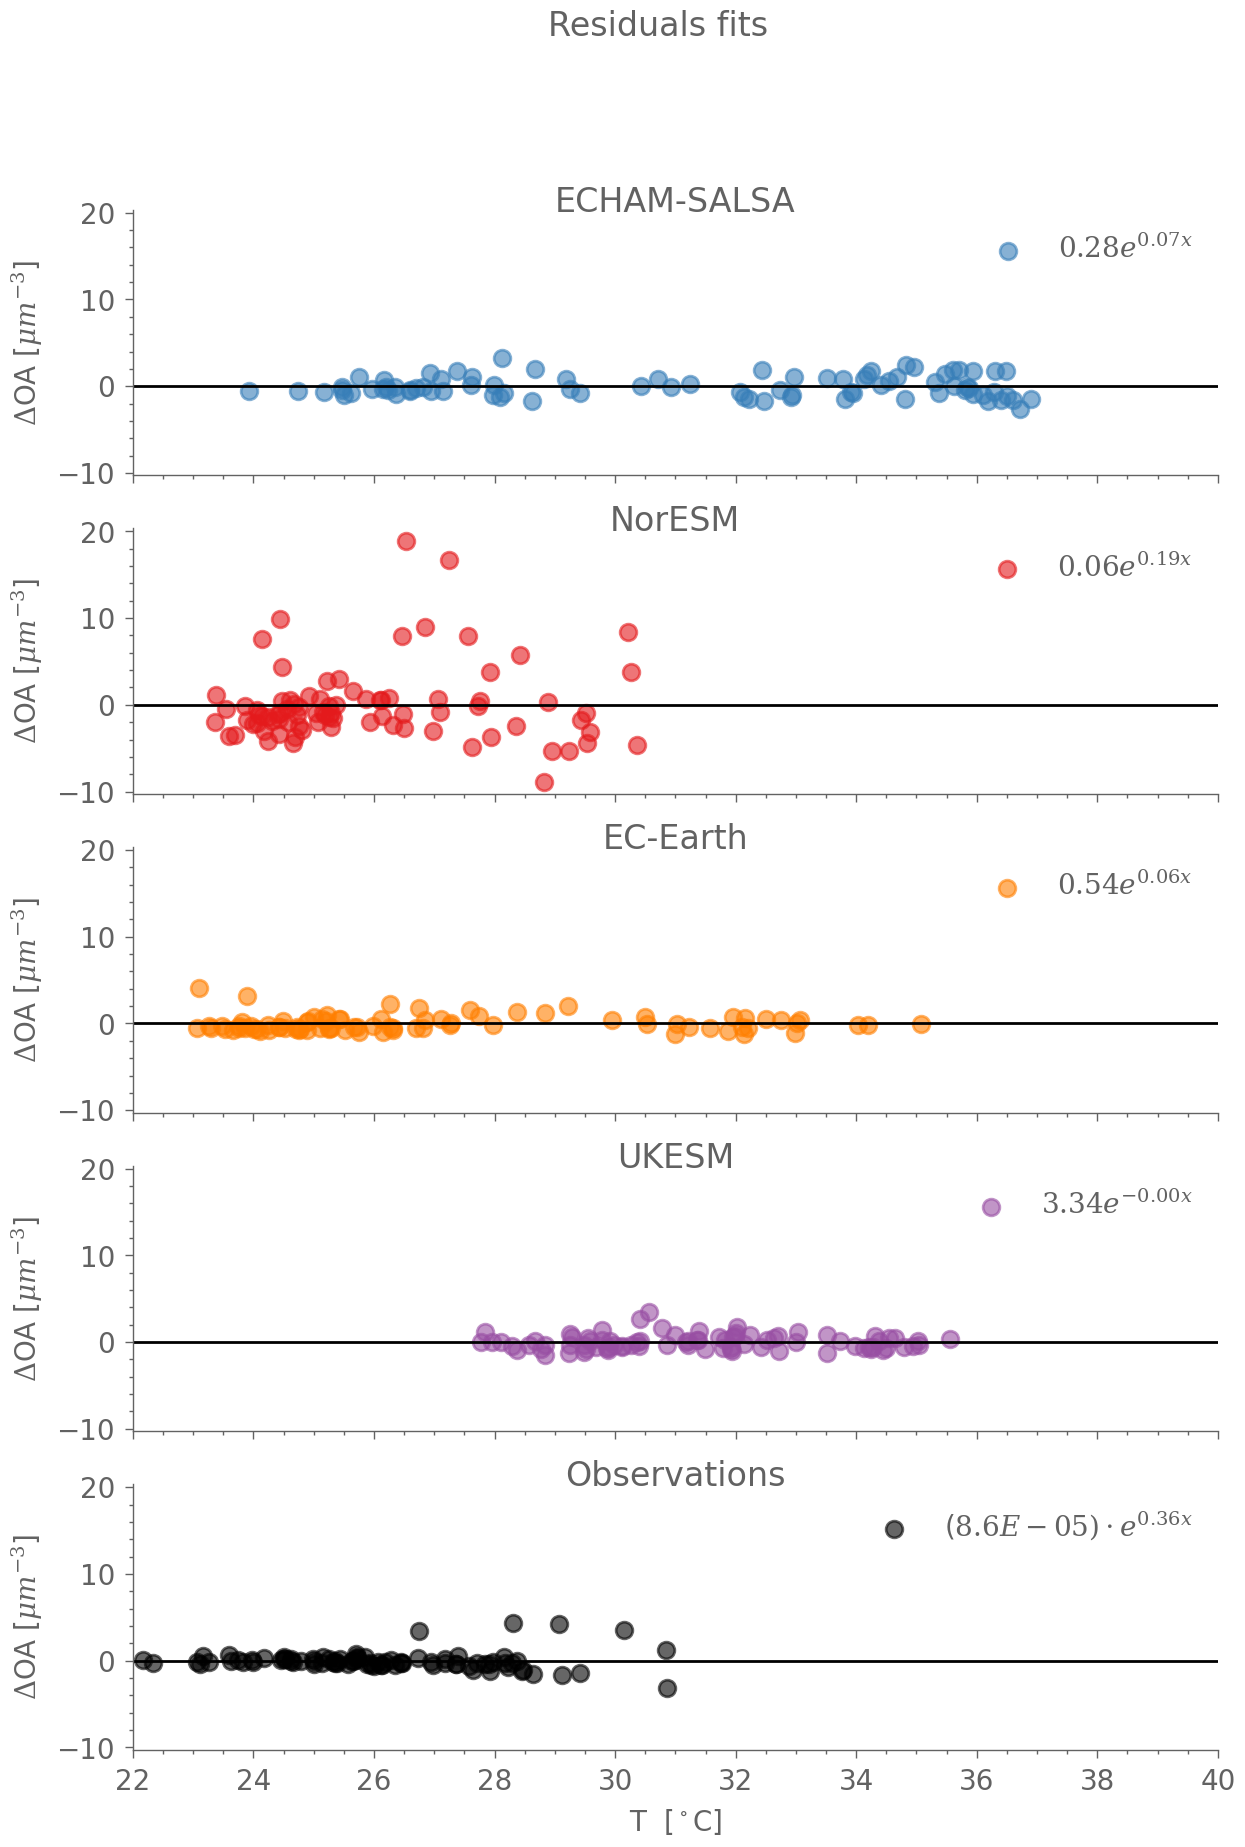

In [60]:
## Settings
alpha_scatt = 0.5

figsize=[7,10]
xlab = r'T  [$^\circ$C]'
ylab = r'$\Delta$OA [$\mu m^{-3}$]'


#ylims = [1,700]

# OBS: 
v_y = 'OA'
v_x = 'T_C'

season = 'JFM'
xscale='linear'
yscale='linear'

fig, axs = plt.subplots(len(models_and_obs), sharex=True, sharey= True, figsize=figsize)

## Settings
alpha_scatt = 0.6


for mo, ax in zip(models_and_obs, axs):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    
    #popt, pov, label, func, out = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True, return_out_obj=True)
    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func = get_least_square_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True)

    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    ax.scatter(df_s[v_x],df_s[v_y]-func(df_s[v_x],*popt),
                                    color=cdic_model[mo], 
                #alpha=alpha_scatt, 
                #facecolor='none',
               alpha=alpha_scatt,
               
                edgecolor=cdic_model[mo],

                label=label
                   )
    _xlim = [_mi*.95, _ma*1.05]
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


    ax.hlines(0, xmin=xlims[0],xmax=xlims[1], color='k', linewidth=1)
    ax.legend(frameon=False)
    ax.set_ylabel(ylab)
    ax.set_title(mo, y=.93)
    ax.set_xlim(xlims)

        
#fig.suptitle('Observations')
axs[-1].set_xlabel(xlab)
fig.suptitle(r'Residuals fits')

sns.despine(fig)    
    
fn = make_fn_scat(f'residual_exp_{season}_{select_station}', v_x, v_y)
ax.legend(frameon=False)
#fig.savefig(fn, dpi=150)
#fig.savefig(fn.with_suffix('.pdf'), dpi=150)
print(fn)

ECHAM-SALSA
[0.01, 0.12]
Beta: [0.00077194 0.27437678]
Beta Std Error: [0.00089416 0.04080276]
Beta Covariance: [[ 1.14790821e-06 -5.22410400e-05]
 [-5.22410400e-05  2.39031230e-03]]
Residual Variance: 0.6965053306737456
Inverse Condition #: 0.015495248529860313
Reason(s) for Halting:
  Sum of squares convergence
[0.00077194 0.27437678]
reason for halting
NorESM
[0.01, 0.12]
Beta: [0.00155342 0.32401861]
Beta Std Error: [0.00109684 0.02741637]
Beta Covariance: [[ 3.43813203e-06 -8.58184084e-05]
 [-8.58184084e-05  2.14810857e-03]]
Residual Variance: 0.34991596740908015
Inverse Condition #: 0.017462088996056755
Reason(s) for Halting:
  Sum of squares convergence
[0.00155342 0.32401861]
reason for halting
EC-Earth
[0.01, 0.12]
Beta: [1.32628367e-04 3.89588225e-01]
Beta Std Error: [0.00014995 0.0455515 ]
Beta Covariance: [[ 3.77086557e-08 -1.14506198e-05]
 [-1.14506198e-05  3.47997744e-03]]
Residual Variance: 0.5962506271363723
Inverse Condition #: 0.0010942819504183576
Reason(s) for Halti

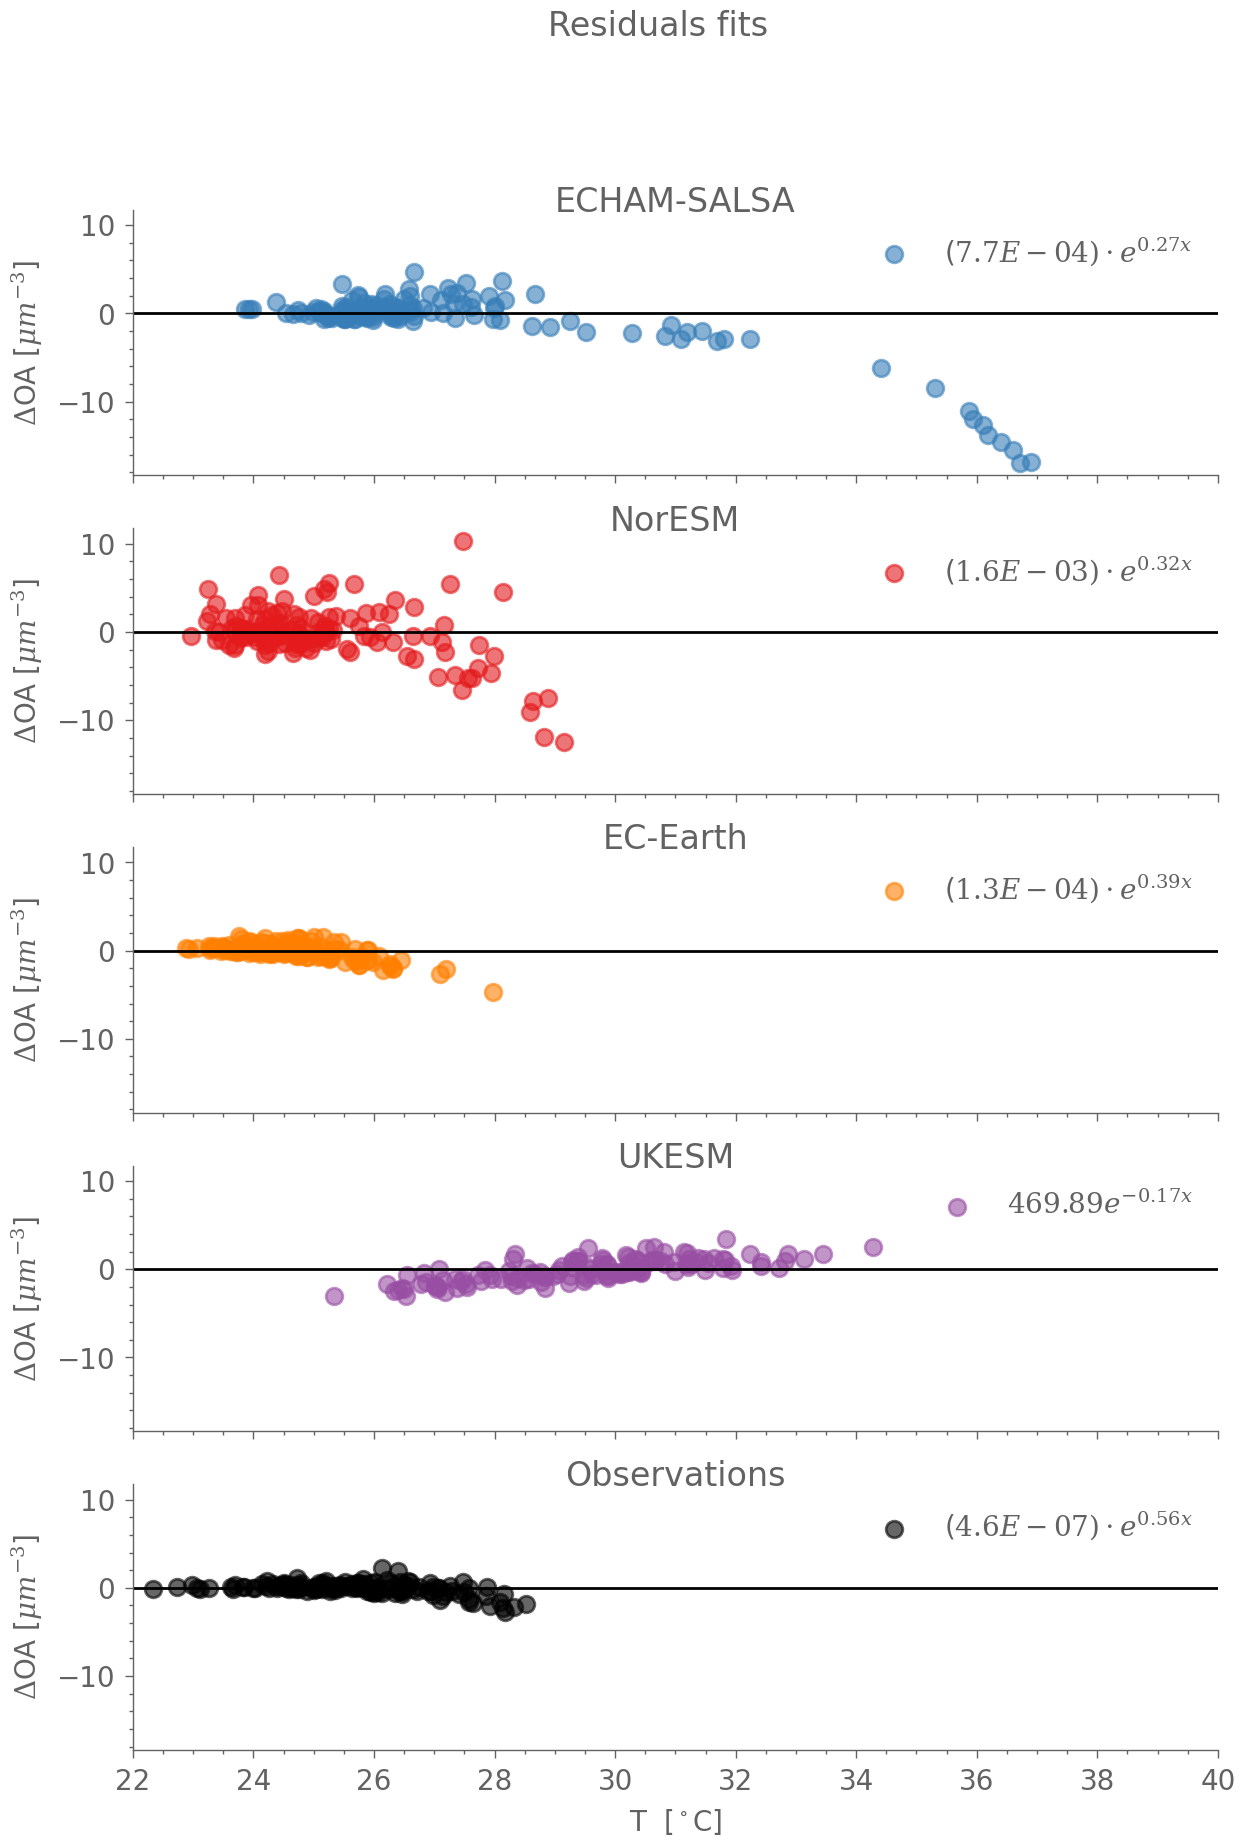

In [61]:
## Settings
alpha_scatt = 0.5

figsize=[7,10]
xlab = r'T  [$^\circ$C]'
ylab = r'$\Delta$OA [$\mu m^{-3}$]'


#ylims = [1,700]

# OBS: 
v_y = 'OA'
v_x = 'T_C'

season = 'MAM'
xscale='linear'
yscale='linear'

fig, axs = plt.subplots(len(models_and_obs), sharex=True, sharey= True, figsize=figsize)

## Settings
alpha_scatt = 0.6


for mo, ax in zip(models_and_obs, axs):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    
    #popt, pov, label, func, out = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True, return_out_obj=True)
    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    #popt, pov, label, func = get_least_square_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True)
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])

    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    ax.scatter(df_s[v_x],df_s[v_y]-func(df_s[v_x],*popt),
                                    color=cdic_model[mo], 
                #alpha=alpha_scatt, 
                #facecolor='none',
               alpha=alpha_scatt,
               
                edgecolor=cdic_model[mo],

                label=label
                   )
    _xlim = [_mi*.95, _ma*1.05]
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


    ax.hlines(0, xmin=xlims[0],xmax=xlims[1], color='k', linewidth=1)
    ax.legend(frameon=False)
    ax.set_ylabel(ylab)
    ax.set_title(mo, y=.93)
    ax.set_xlim(xlims)

        
#fig.suptitle('Observations')
axs[-1].set_xlabel(xlab)
fig.suptitle(r'Residuals fits')

sns.despine(fig)    
    
fn = make_fn_scat(f'residual_exp_{season}_{select_station}', v_x, v_y)
ax.legend(frameon=False)
#fig.savefig(fn, dpi=150)
#fig.savefig(fn.with_suffix('.pdf'), dpi=150)
print(fn)

### JFM

(0.0, 13.65)
(0.0, 28.35)
(0.0, 28.35)
(0.0, 28.35)
(0.0, 28.35)
ECHAM-SALSA
[0.01, 0.12]
Beta: [0.02730849 0.14341676]
Beta Std Error: [0.01635872 0.01816671]
Beta Covariance: [[ 0.00069292 -0.00076614]
 [-0.00076614  0.00085455]]
Residual Variance: 0.38620263559340084
Inverse Condition #: 0.00797158758323316
Reason(s) for Halting:
  Sum of squares convergence
[0.02730849 0.14341676]
reason for halting
NorESM
[0.01, 0.12]
Beta: [0.00206034 0.31692435]
Beta Std Error: [0.00180048 0.03243813]
Beta Covariance: [[ 1.11092744e-05 -1.99737466e-04]
 [-1.99737466e-04  3.60595081e-03]]
Residual Variance: 0.2918043356274065
Inverse Condition #: 0.02627489278440532
Reason(s) for Halting:
  Sum of squares convergence
[0.00206034 0.31692435]
reason for halting
EC-Earth
[0.01, 0.12]
Beta: [0.05157641 0.14090226]
Beta Std Error: [0.02824368 0.01953113]
Beta Covariance: [[ 0.00151937 -0.00104612]
 [-0.00104612  0.00072657]]
Residual Variance: 0.5250226534205149
Inverse Condition #: 0.0050984979191150

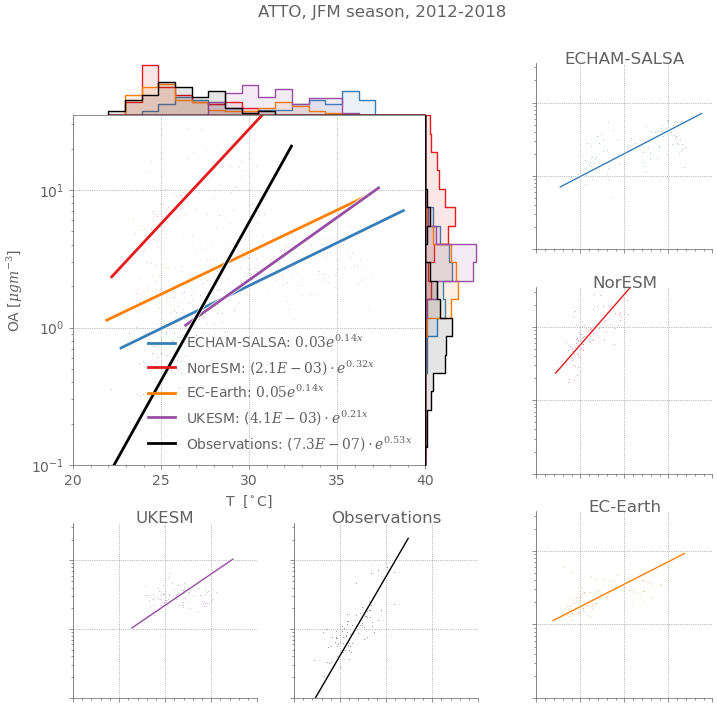

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [62]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,40]
ylims = [.1,35]


season='JFM'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='log',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    #popt, pov, label, func = get_least_square_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])

    ax_ex.set_ylim(ylims)
    ax_ex.set_xlim(xlims)

    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')

ax.set_xticks(np.arange(20,41,5))
ax.grid(color='grey', linewidth=.5, linestyle=':')

for ax_ex in axs_extra.flatten():
    ax_ex.set_yticklabels([])
    ax_ex.set_xticks(np.arange(20,41,5))
    ax_ex.grid(color='grey', linewidth=.5, linestyle=':')

    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

ECHAM-SALSA
[0.01, 0.12]
Beta: [0.02730849 0.14341676]
Beta Std Error: [0.01635872 0.01816671]
Beta Covariance: [[ 0.00069292 -0.00076614]
 [-0.00076614  0.00085455]]
Residual Variance: 0.38620263559340084
Inverse Condition #: 0.00797158758323316
Reason(s) for Halting:
  Sum of squares convergence
[0.02730849 0.14341676]
reason for halting
NorESM
[0.01, 0.12]
Beta: [0.00206034 0.31692435]
Beta Std Error: [0.00180048 0.03243813]
Beta Covariance: [[ 1.11092744e-05 -1.99737466e-04]
 [-1.99737466e-04  3.60595081e-03]]
Residual Variance: 0.2918043356274065
Inverse Condition #: 0.02627489278440532
Reason(s) for Halting:
  Sum of squares convergence
[0.00206034 0.31692435]
reason for halting
EC-Earth
[0.01, 0.12]
Beta: [0.05157641 0.14090226]
Beta Std Error: [0.02824368 0.01953113]
Beta Covariance: [[ 0.00151937 -0.00104612]
 [-0.00104612  0.00072657]]
Residual Variance: 0.5250226534205149
Inverse Condition #: 0.005098497919115032
Reason(s) for Halting:
  Sum of squares convergence
[0.0515764

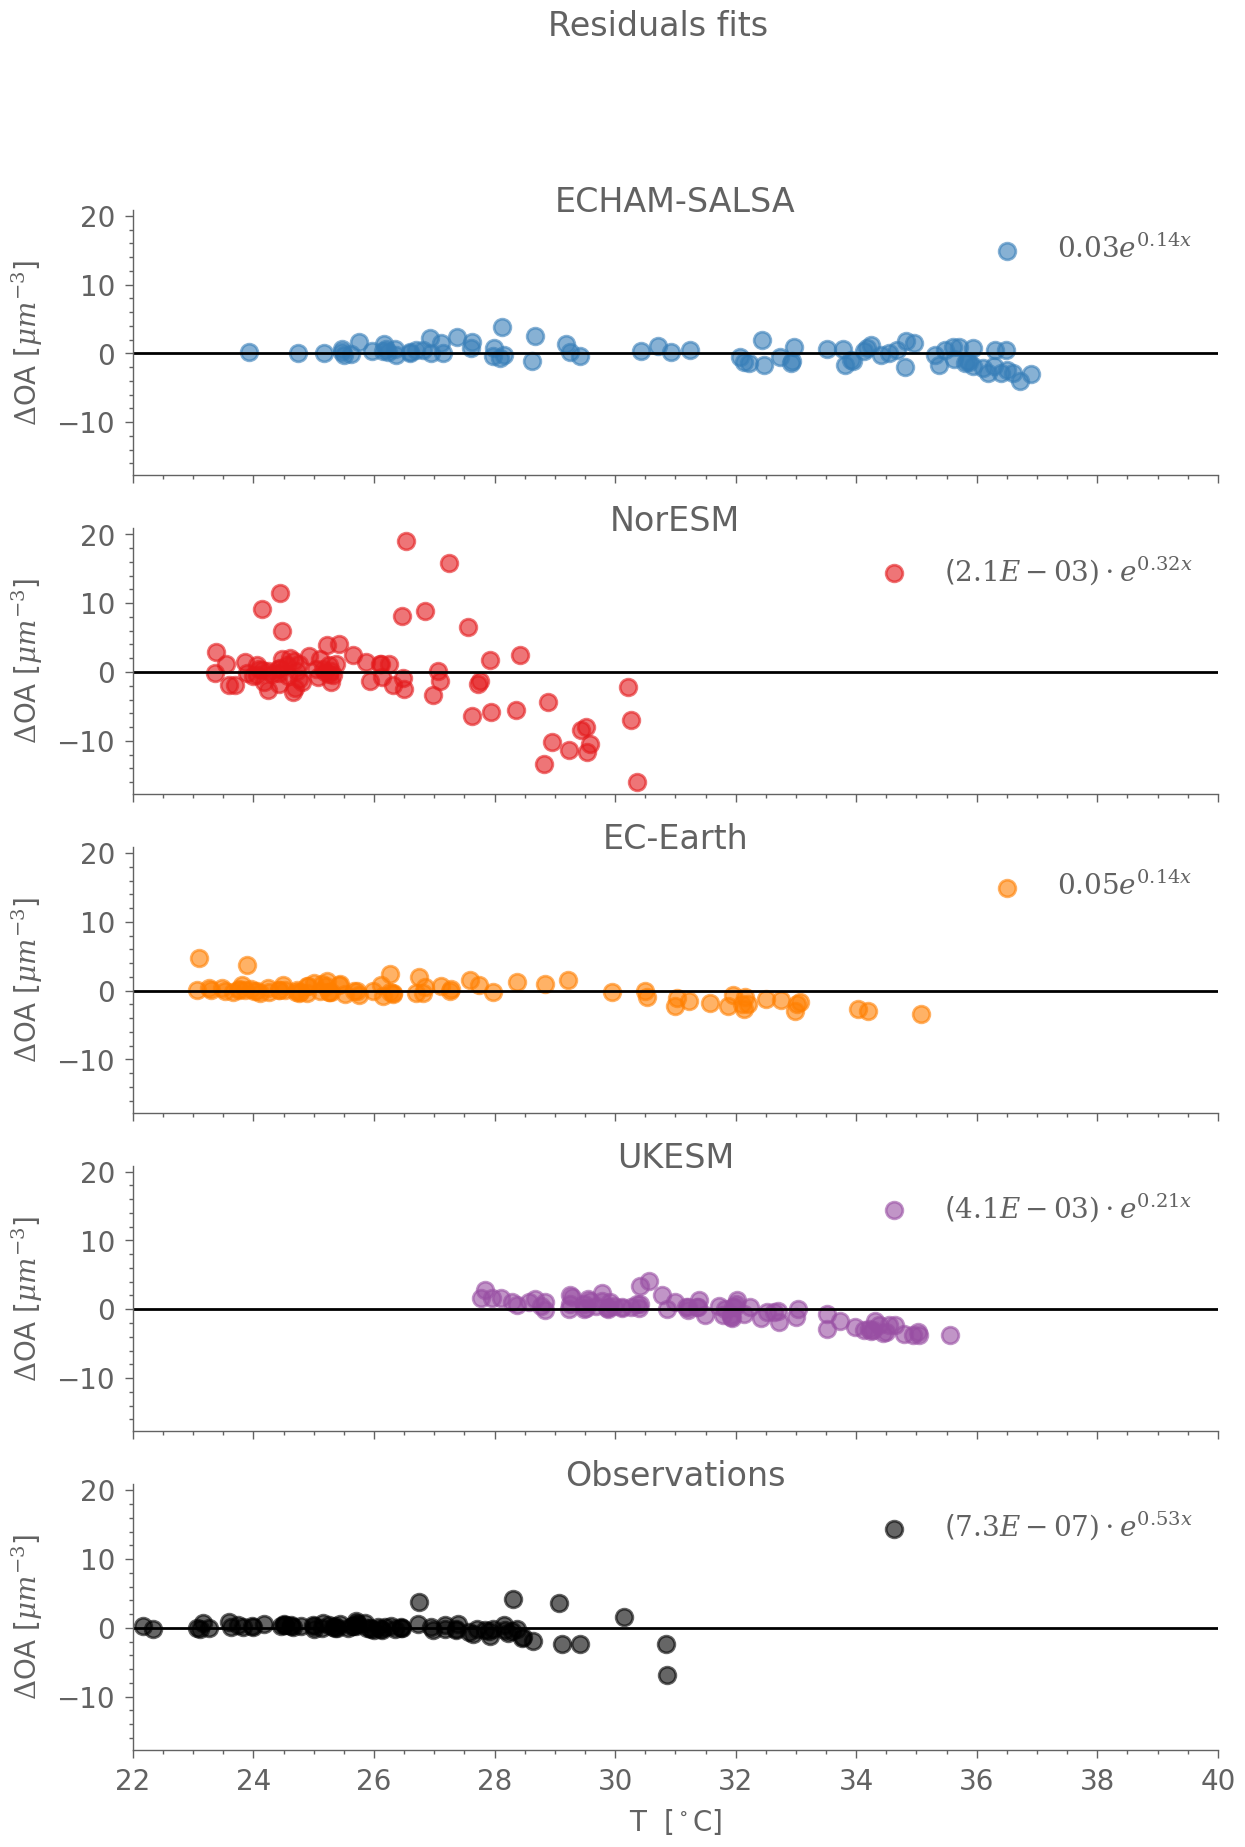

In [63]:
## Settings
alpha_scatt = 0.5

figsize=[7,10]
xlab = r'T  [$^\circ$C]'
ylab = r'$\Delta$OA [$\mu m^{-3}$]'


#ylims = [1,700]

# OBS: 
v_y = 'OA'
v_x = 'T_C'

season = 'JFM'
xscale='linear'
yscale='linear'

fig, axs = plt.subplots(len(models_and_obs), sharex=True, sharey= True, figsize=figsize)

## Settings
alpha_scatt = 0.6


for mo, ax in zip(models_and_obs, axs):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    
    #popt, pov, label, func, out = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True, return_out_obj=True)
    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    #popt, pov, label, func = get_least_square_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True)
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])

    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    ax.scatter(df_s[v_x],df_s[v_y]-func(df_s[v_x],*popt),
                                    color=cdic_model[mo], 
                #alpha=alpha_scatt, 
                #facecolor='none',
               alpha=alpha_scatt,
               
                edgecolor=cdic_model[mo],

                label=label
                   )
    _xlim = [_mi*.95, _ma*1.05]
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


    ax.hlines(0, xmin=xlims[0],xmax=xlims[1], color='k', linewidth=1)
    ax.legend(frameon=False)
    ax.set_ylabel(ylab)
    ax.set_title(mo, y=.93)
    ax.set_xlim(xlims)

        
#fig.suptitle('Observations')
axs[-1].set_xlabel(xlab)
fig.suptitle(r'Residuals fits')

sns.despine(fig)    
    
fn = make_fn_scat(f'residual_exp_{season}_{select_station}', v_x, v_y)
ax.legend(frameon=False)
#fig.savefig(fn, dpi=150)
#fig.savefig(fn.with_suffix('.pdf'), dpi=150)
print(fn)

### DJF

(0.0, 18.9)
(0.0, 18.9)
(0.0, 18.9)
(0.0, 22.05)
(0.0, 22.05)
ECHAM-SALSA
[0.01, 0.12]
Beta: [0.01125894 0.17035819]
Beta Std Error: [0.00632635 0.01653941]
Beta Covariance: [[ 0.00019645 -0.00051211]
 [-0.00051211  0.00134271]]
Residual Variance: 0.2037306937366645
Inverse Condition #: 0.01374101117184703
Reason(s) for Halting:
  Sum of squares convergence
[0.01125894 0.17035819]
reason for halting
NorESM
[0.01, 0.12]
Beta: [0.02790389 0.22179599]
Beta Std Error: [0.02781367 0.03585311]
Beta Covariance: [[ 0.00114927 -0.00147937]
 [-0.00147937  0.00190967]]
Residual Variance: 0.6731237657435544
Inverse Condition #: 0.00517553475108238
Reason(s) for Halting:
  Sum of squares convergence
[0.02790389 0.22179599]
reason for halting
EC-Earth
[0.01, 0.12]
Beta: [0.08182842 0.12414615]
Beta Std Error: [0.0600114  0.02436015]
Beta Covariance: [[ 0.00427489 -0.00173193]
 [-0.00173193  0.0007044 ]]
Residual Variance: 0.8424466530747633
Inverse Condition #: 0.0020391233033028085
Reason(s) for Ha

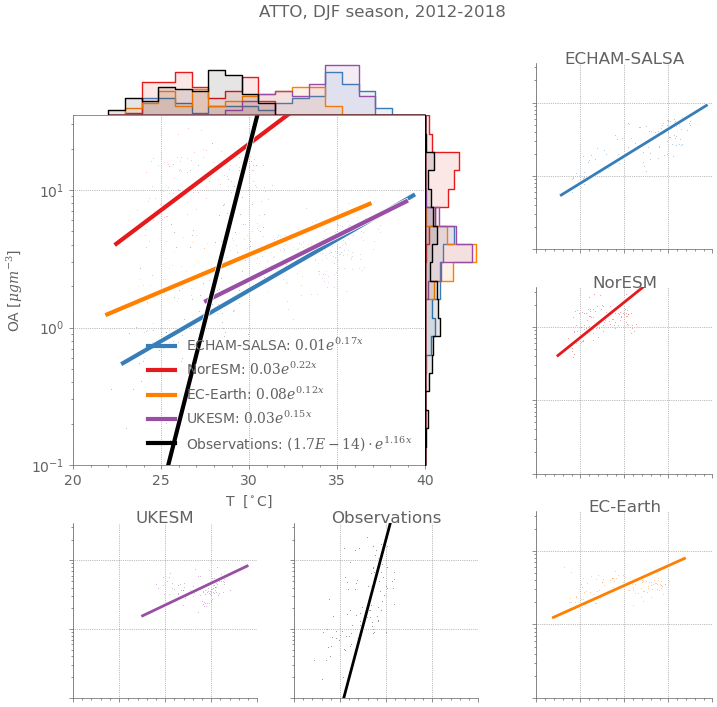

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [64]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'


linewidth=2
xlims = [22,40]
ylims = [.1,35]


season='DJF'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='log',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=linewidth+2,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=linewidth+1, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=linewidth+1,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
               linewidth=linewidth,
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')
ax.set_xticks(np.arange(20,41,5))
ax.grid(color='grey', linewidth=.5, linestyle=':')

for ax_ex in axs_extra.flatten():
    ax_ex.set_yticklabels([])
    ax_ex.set_xticks(np.arange(20,41,5))
    ax_ex.grid(color='grey', linewidth=.5, linestyle=':')


    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

### SON

(0.0, 24.15)
(0.0, 48.3)
(0.0, 48.3)
(0.0, 48.3)
(0.0, 48.3)
ECHAM-SALSA
[0.01, 0.12]
Beta: [6.03605783e-05 3.41054297e-01]
Beta Std Error: [0.00013577 0.06436568]
Beta Covariance: [[ 4.72722609e-08 -2.24014470e-05]
 [-2.24014470e-05  1.06241419e-02]]
Residual Variance: 0.3899553292266658
Inverse Condition #: 0.0006992915985933364
Reason(s) for Halting:
  Sum of squares convergence
[6.03605783e-05 3.41054297e-01]
reason for halting
NorESM
[0.01, 0.12]
Beta: [3.94432722e-14 1.10885251e+00]
Beta Std Error: [7.34115675e-15 0.00000000e+00]
Beta Covariance: [[5.76587651e-29 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]]
Residual Variance: 0.9346815242453166
Inverse Condition #: 1.0
Reason(s) for Halting:
  Problem is not full rank at solution
  Sum of squares convergence
[3.94432722e-14 1.10885251e+00]
reason for halting
EC-Earth
[0.01, 0.12]
Beta: [1.57108064e-13 9.18416988e-01]
Beta Std Error: [4.46452925e-12 8.39285047e-01]
Beta Covariance: [[ 1.87374476e-23 -3.52236194e-12]
 [-3.5223

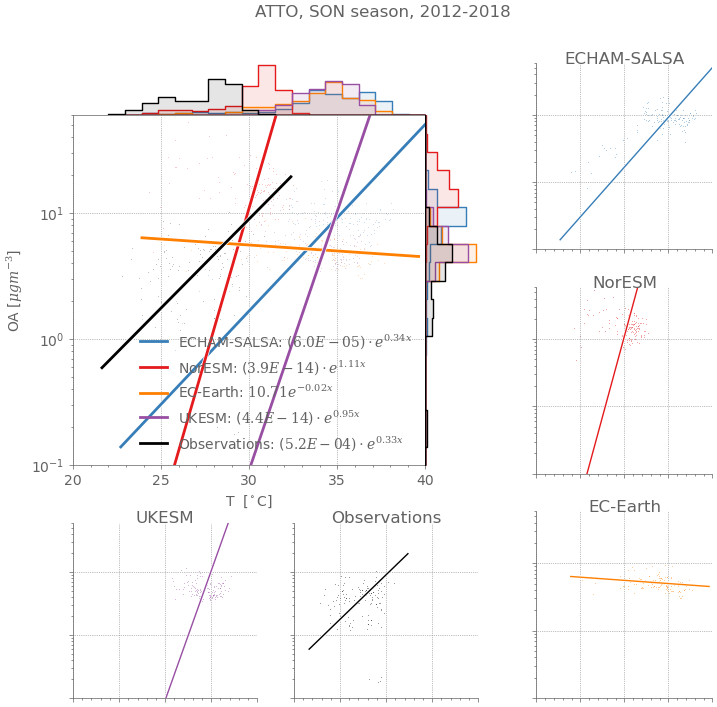

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [65]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,40]
ylims = [.1,60]


season='SON'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='log',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')
ax.set_xticks(np.arange(20,41,5))
ax.grid(color='grey', linewidth=.5, linestyle=':')

for ax_ex in axs_extra.flatten():
    ax_ex.set_yticklabels([])
    ax_ex.set_xticks(np.arange(20,41,5))
    ax_ex.grid(color='grey', linewidth=.5, linestyle=':')


    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

### MAM

### JJA

### JFM

In [66]:
from bs_fdbck_clean.util.BSOA_datamanip.fits import *

In [67]:
import scipy

## OA to number: Various seasons

### Plotting functions

In [68]:
def make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=None, ylab=None, alpha_scat=.4,
             source_list = models_and_obs, fig=None, 
               axs=None,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
               divide_NorESM_by_factor = None,
             ):
    if xlab is None: 
        if xlab in label_dic:
            xlab = label_dic[v_x]
    if ylab is None: 
        if ylab in label_dic:
            ylab = label_dic[v_y]

    for mo, ax in zip(source_list, axs[:]):
        df_s =  dic_df_med[mo]
        mask_months = select_months(df_s, season=season)
        df_s = df_s[mask_months].copy()
        if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
            df_s = df_s/divide_NorESM_by_factor
            title = f'{mo}/{divide_NorESM_by_factor}'
            ax.spines['bottom'].set_color('r')
            ax.spines['top'].set_color('r') 
            ax.spines['right'].set_color('red')
            ax.spines['left'].set_color('red')
            ax.set_title(title, y=.95, c='r')

        else:
            title = mo
            ax.set_title(title, y=.95)
            
        sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt+.1, 
                    label='__nolegend__',
                    ax = ax,
                    #facecolor='none',
                    edgecolor=cdic_model[mo],
                        marker='.',
                    
                    
                   )
        
        
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    fig.suptitle(f'{select_station}, {season} season, 2012-2018', y=.95)
    xlim_dist = list(daxs['y'].get_xlim())
    for mo,ax in zip(source_list, axs):

        df_s =  dic_df_med[mo]

        mask_months = select_months(df_s, season=season)
        df_s = df_s[mask_months].copy()
        if xscale=='log':
            xbins = np.logspace(np.log10(xlims[0]),np.log10(xlims[1]),20)
        else:
            xbins = np.linspace(xlims[0],xlims[1],20)
            
        if yscale=='log':
            ybins = np.logspace(np.log10(ylims[0]),np.log10(ylims[1]),20)
        else:
            ybins = np.linspace(ylims[0],ylims[1],20)
            

        ax.set_ylim(ylims)
        ax.set_xlim(xlims)

        sns.despine(ax = ax)

    return

#### WET_mid

In [69]:
def plot_fit(func, popt, mo, xlims, yscale, xscale, ax, label):

    x = np.linspace(*xlims)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')

    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{label}')
    ax.set_yscale(yscale)
    ax.set_xscale(xscale)



In [70]:
models_and_obs[::-1]

['Observations', 'UKESM', 'EC-Earth', 'NorESM', 'ECHAM-SALSA']

### JFM

Observations
[342.18596523  83.6953045 ]
Beta: [357.37422194  64.10179194]
Beta Std Error: [11.63032484 22.5410215 ]
Beta Covariance: [[ 3106.88577237 -4008.01807547]
 [-4008.01807547 11670.48172866]]
Residual Variance: 0.043536990350586606
Inverse Condition #: 0.3407819091605916
Reason(s) for Halting:
  Sum of squares convergence
[357.37422194  64.10179194]
reason for halting
UKESM
[ 37.8669827  339.75337678]
Beta: [ 63.92729787 260.12640725]
Beta Std Error: [ 7.14426174 22.4912587 ]
Beta Covariance: [[ 122.21497528 -373.42633436]
 [-373.42633436 1211.25959784]]
Residual Variance: 0.4176286559023398
Inverse Condition #: 0.061683873966751304
Reason(s) for Halting:
  Sum of squares convergence
[ 63.92729787 260.12640725]
reason for halting
EC-Earth
[ 54.48192134 192.99712084]
Beta: [ 66.95682259 161.81725847]
Beta Std Error: [ 4.74003626 12.7357112 ]
Beta Covariance: [[ 117.70975732 -294.20464923]
 [-294.20464923  849.75854628]]
Residual Variance: 0.19087579710442887
Inverse Condition #

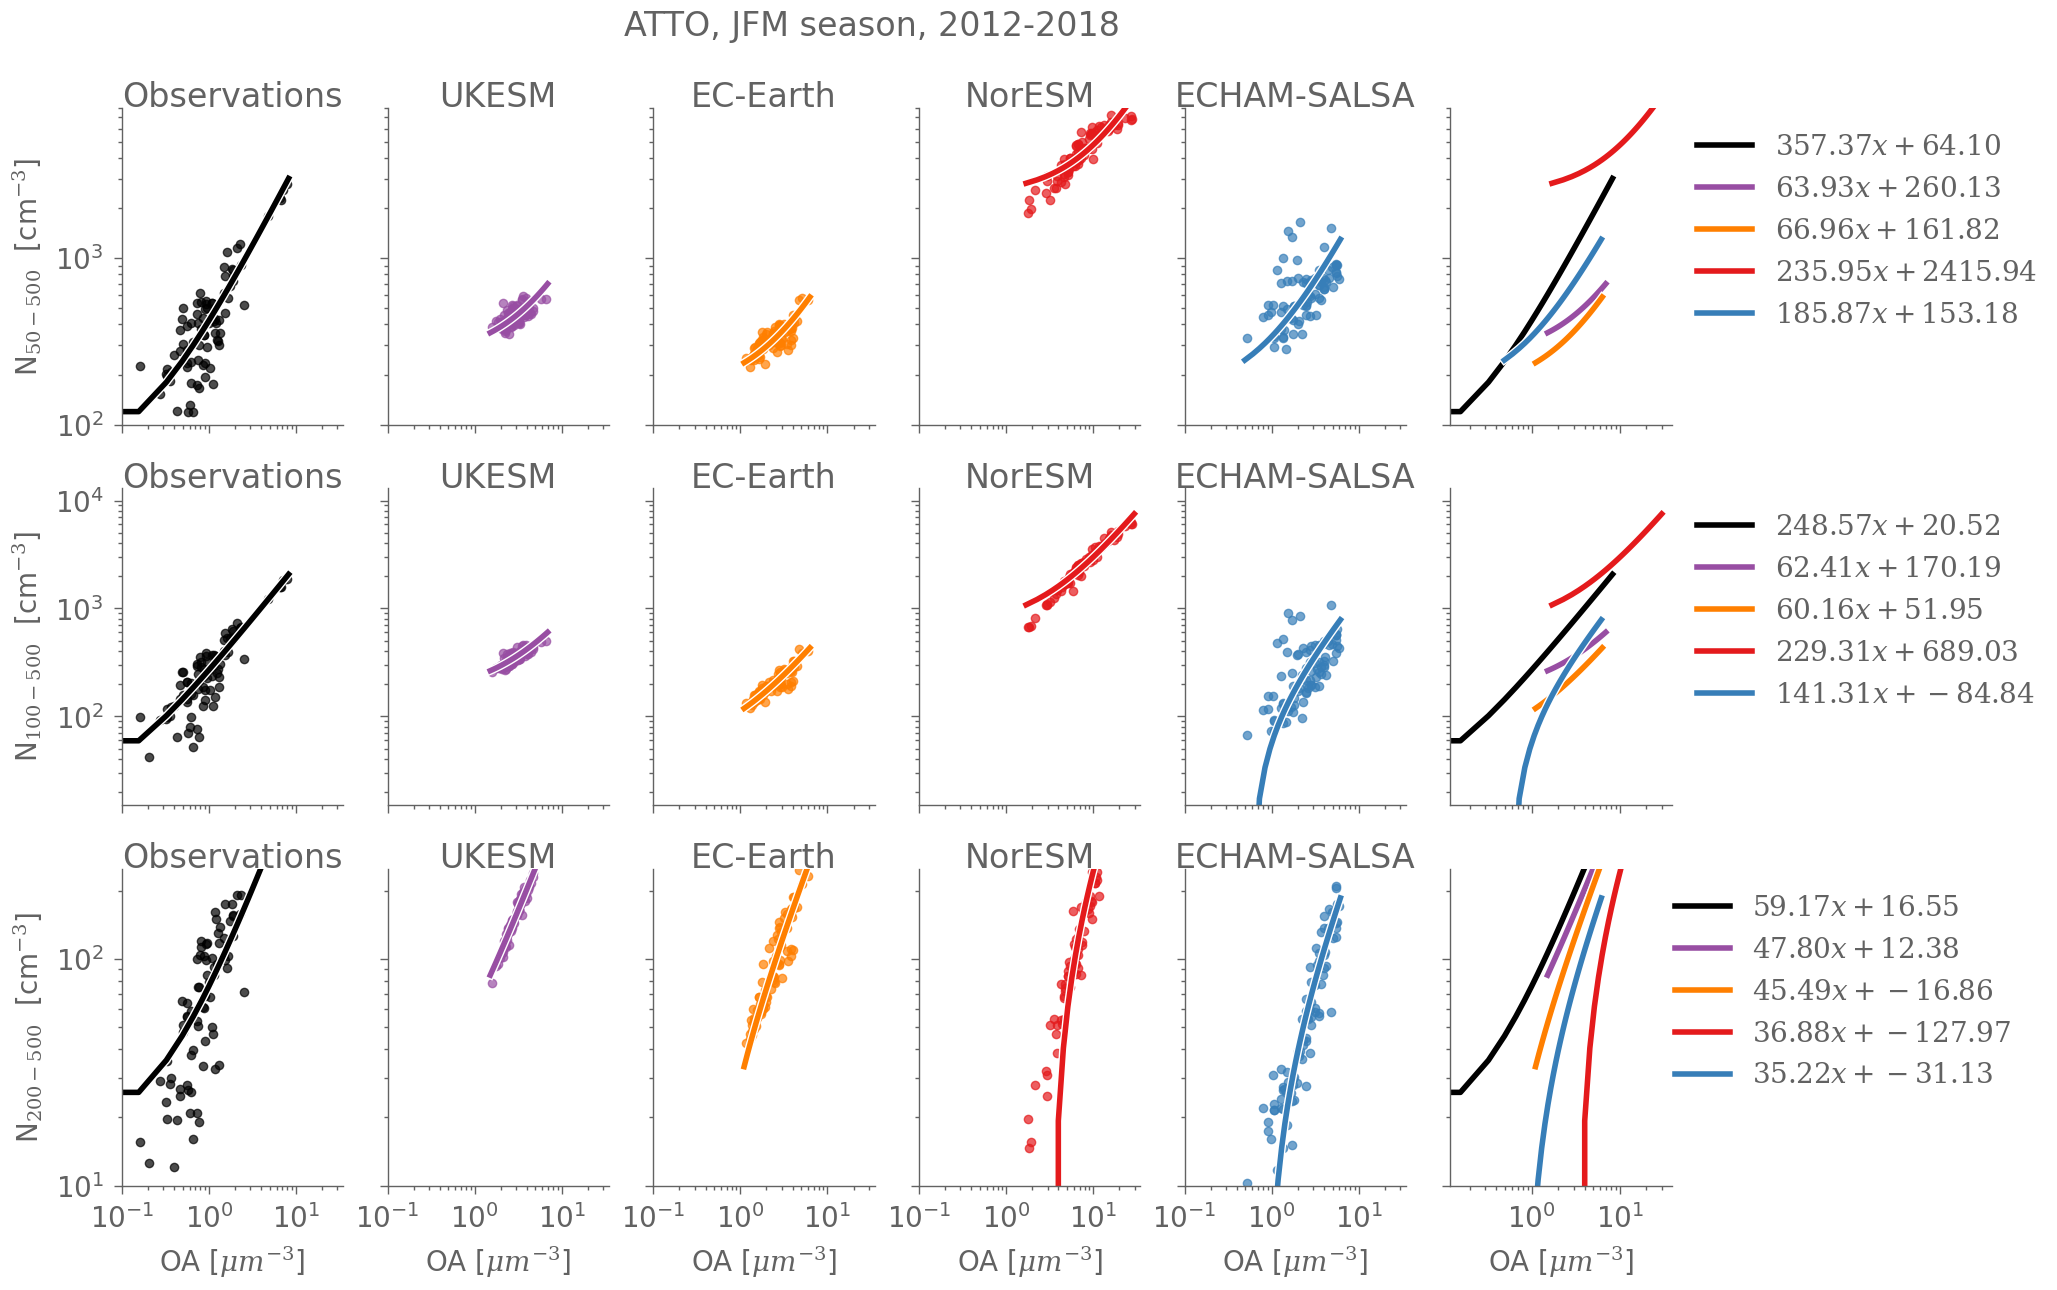

In [71]:
## Settings
alpha_scatt = 0.5
figsize=[10,7]

xlab = r'OA [$\mu m^{-3}$]'

season = 'JFM'
source_list = models_and_obs[::-1]

xlims = [.1,35]

ylims = [100,8000]

# OBS: 
v_y = 'N50-500'
v_x = 'OA'
ylab = r'N$_{50-500}$  [cm$^{-3}$]'



xscale='log'
yscale='log'

fig, axs_all = plt.subplots(3,6,figsize=figsize, sharey='row', sharex='col')


## Settings
alpha_scatt = 0.6



# Make plot
axs_sub = axs_all[0,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list = source_list, 
           fig=fig, 
           axs=axs_sub,
           xscale='linear', yscale='linear',
           dic_df_med = dic_df_med,
         )


for mo, ax in zip(source_list, axs_sub):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    
    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)

    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label)
    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

axs_sub[-1].legend(bbox_to_anchor=(1,1,), frameon=False)
#xlims = [.01,10]

xlims = [.1,35]

ylims = [15,13000]

# OBS: 
v_y = 'N100-500'
ylab = r'N$_{100-500}$  [cm$^{-3}$]'


xscale='log'
yscale='log'
axs_sub = axs_all[1,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list =source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
         )
for mo, ax in zip(source_list, axs_sub):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label)

    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

    
axs_sub[-1].legend(bbox_to_anchor=(1,1,), frameon=False)
    
    

    
    
    

    
#xlims = [.01,10]

ylims = [10,250]





# OBS: 
v_y = 'N200-500'
ylab = r'N$_{200-500}$  [cm$^{-3}$]'


xscale='log'
yscale='log'
axs_sub = axs_all[2,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list = source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
         )

for mo, ax in zip(source_list, axs_sub):
    print(mo)
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    
    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label=label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label=label)

    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

leg = axs_sub[-1].legend(bbox_to_anchor=(.9,1,), frameon=False)

    
for ax in axs_sub:
    ax.set_xlabel(xlab)
sns.despine(fig) 

    
    
fn = make_fn_scat(f'together_{season}', v_x, 'Nx')
#ax.legend(frameon=False)
fig.savefig(fn, dpi=150, bbox_inches='tight')#)
fig.savefig(fn.with_suffix('.pdf'), dpi=150, bbox_inches='tight')#)
print(fn)

### JFMAM

Observations
[329.78841706  65.85885165]
Beta: [353.64210863  37.0792298 ]
Beta Std Error: [ 9.96041687 16.2819195 ]
Beta Covariance: [[ 1454.2467405  -1754.55820366]
 [-1754.55820366  3885.92375158]]
Residual Variance: 0.06822081940247503
Inverse Condition #: 0.33790038059941524
Reason(s) for Halting:
  Sum of squares convergence
[353.64210863  37.0792298 ]
reason for halting
parameter: 353.64210863192034
   conf interval: 333.9848834205694 373.29933384327126
   tstat: 35.50474977116501
   pstat: 0.0

parameter: 37.07922979971886
   conf interval: 4.9463017769434146 69.2121578224943
   tstat: 2.2773254596460455
   pstat: 0.023969972840673037

UKESM
[ 74.40904861 279.06420157]
Beta: [165.7195997  -25.21268655]
Beta Std Error: [15.40705802 52.55332842]
Beta Covariance: [[  425.93280475 -1419.34679809]
 [-1419.34679809  4955.66690755]]
Residual Variance: 0.5573119378459487
Inverse Condition #: 0.05090909410508562
Reason(s) for Halting:
  Sum of squares convergence
[165.7195997  -25.21268

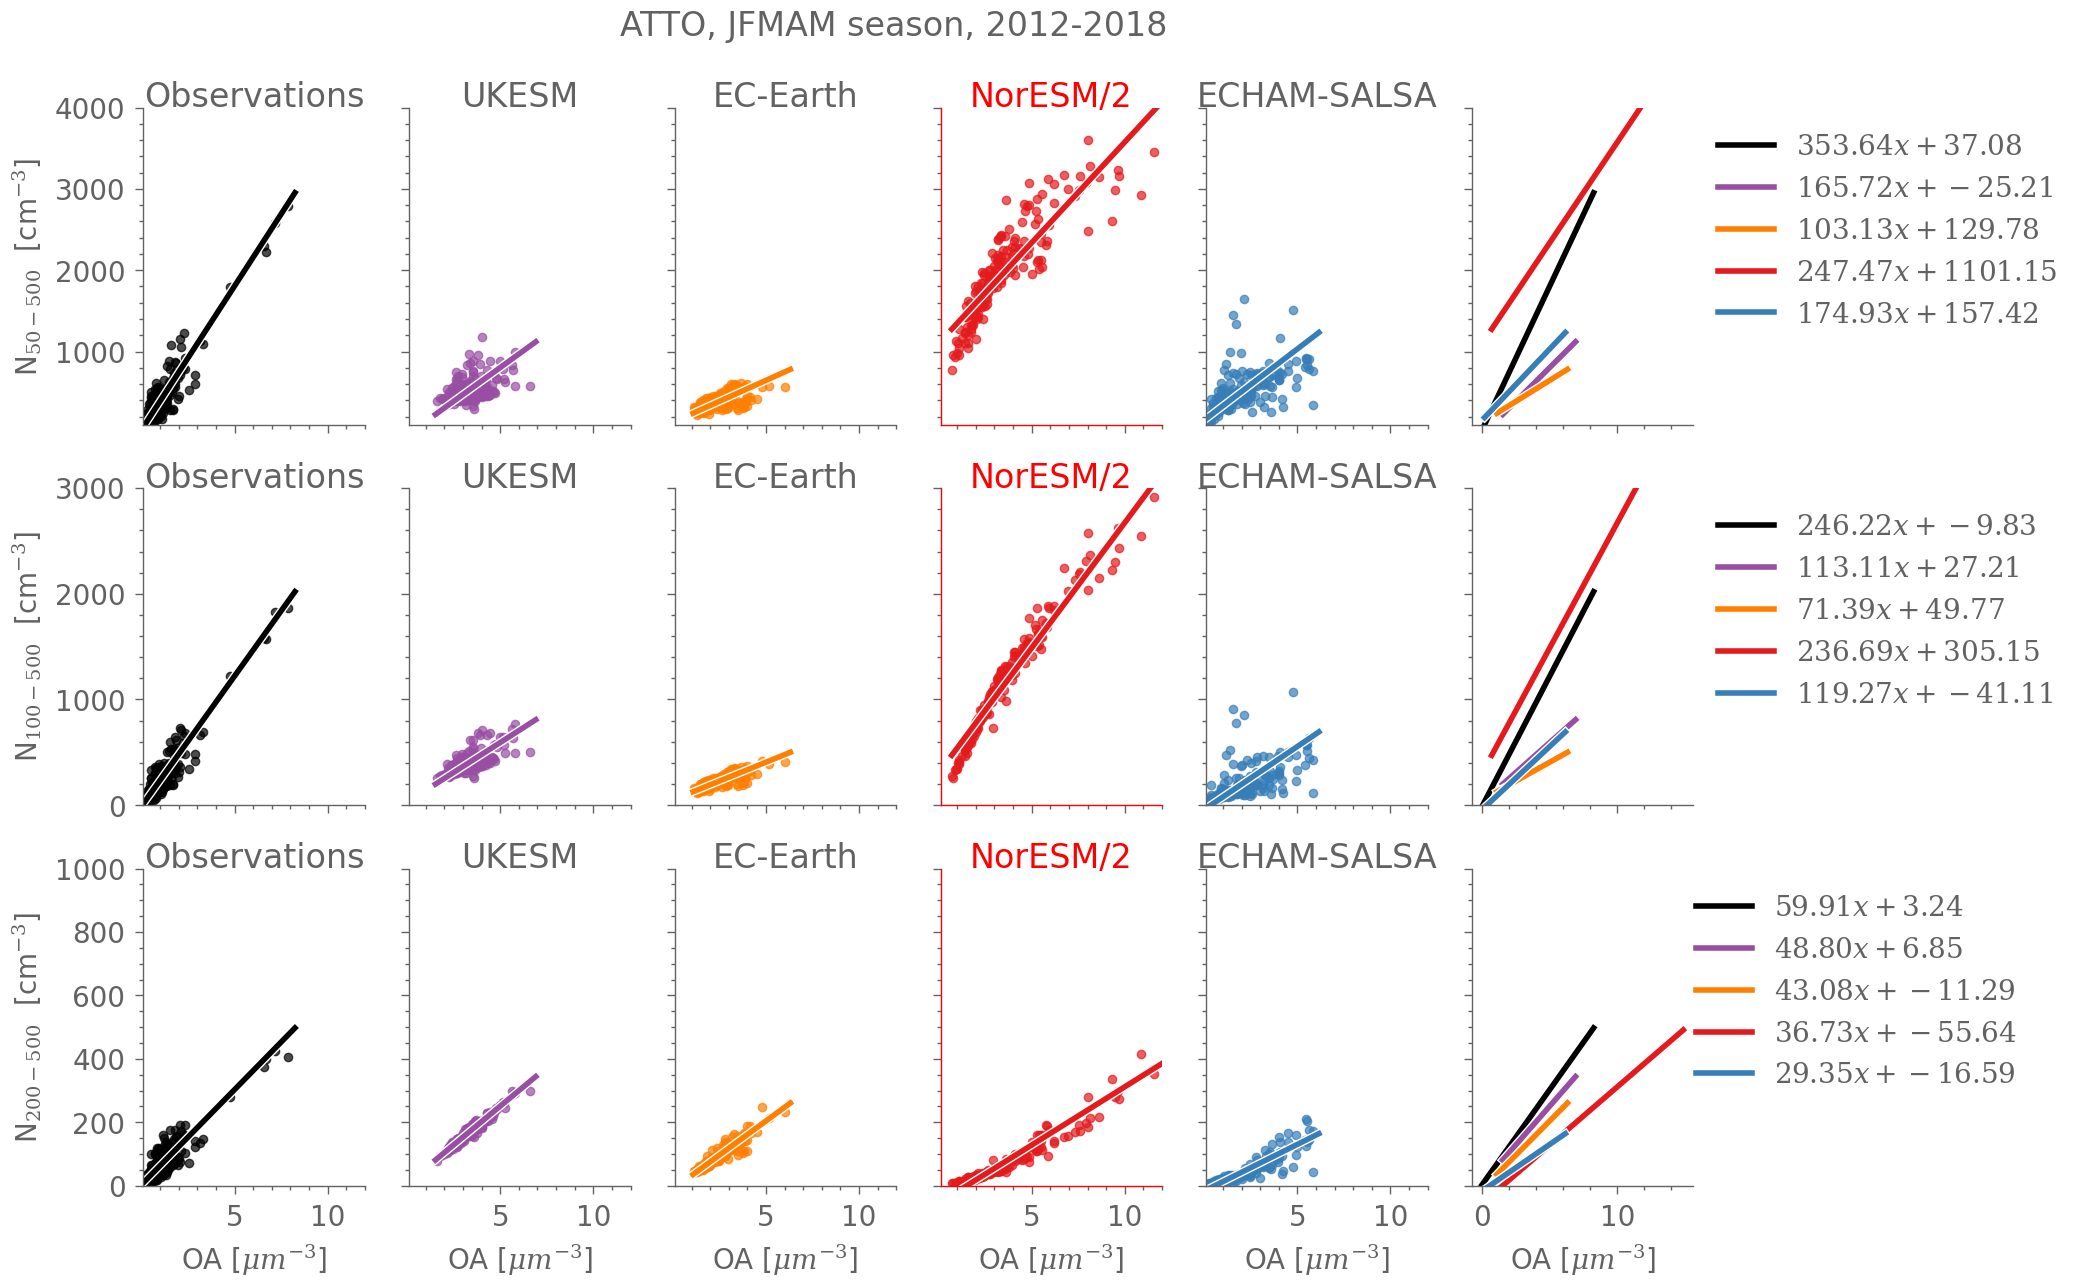

In [72]:
## Settings
alpha_scatt = 0.5
figsize=[10,7]
divide_NorESM_by_factor = 2
xlab = r'OA [$\mu m^{-3}$]'

season = 'JFMAM'
source_list = models_and_obs[::-1]

xlims = [.1,12]

ylims = [100,4000]

# OBS: 
v_x = 'OA'

v_y = 'N50-500'
ylab = r'N$_{50-500}$  [cm$^{-3}$]'



xscale='linear'
yscale='linear'

fig, axs_all = plt.subplots(3,6,figsize=figsize, sharey='row', sharex='col')


## Settings
alpha_scatt = 0.6



# Make plot
axs_sub = axs_all[0,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list = source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
         )


for mo, ax in zip(source_list, axs_sub):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor

    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func, out = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func='linear',  #beta0 = [0,500],
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       
                                                       return_func=True, return_out_obj=True)
    
    
    compute_p_value(df_s, out, popt)

    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label=label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label=label)
    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

axs_sub[-1].legend(bbox_to_anchor=(1,1,), frameon=False)
#xlims = [.01,10]

ylims = [0,3000]

# OBS: 
v_y = 'N100-500'
ylab = r'N$_{100-500}$  [cm$^{-3}$]'

xscale='linear'
yscale='linear'
axs_sub = axs_all[1,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list =source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
           
         )
for mo, ax in zip(source_list, axs_sub):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor

    popt, pov, label, func, out = get_odr_fit_and_labs(df_s,v_x,v_y, beta0 = [0,500],
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       
                                                  fit_func='linear', return_func=True, return_out_obj=True)
    compute_p_value(df_s, out, popt)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label=label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label=label)

    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

    

    
axs_sub[-1].legend(bbox_to_anchor=(1,1,), frameon=False)
    
    
#xlims = [.01,10]

ylims = [0,1000]





# OBS: 
v_y = 'N200-500'
ylab = r'N$_{200-500}$  [cm$^{-3}$]'


xscale='linear'
yscale='linear'
axs_sub = axs_all[2,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list = source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
           
         )

for mo, ax in zip(source_list, axs_sub):
    print(mo)
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor
    
    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func, out = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', 
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       return_func=True, return_out_obj=True)
    compute_p_value(df_s, out, popt)
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label)

    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

leg = axs_sub[-1].legend(bbox_to_anchor=(.9,1,), frameon=False)

    
for ax in axs_sub:
    ax.set_xlabel(xlab)
sns.despine(fig) 



    
    
fn = make_fn_scat(f'together_{season}_linscale', v_x, 'Nx')
#ax.legend(frameon=False)
fig.savefig(fn, dpi=150, bbox_inches='tight')#)
fig.savefig(fn.with_suffix('.pdf'), dpi=150, bbox_inches='tight')#)
print(fn)

Observations
[173.43989363 156.17322567]
Beta: [280.00588929  67.58433373]
Beta Std Error: [26.75078468 24.80809204]
Beta Covariance: [[ 1844.38358304 -1533.24622438]
 [-1533.24622438  1586.22549409]]
Residual Variance: 0.3879911355530951
Inverse Condition #: 0.21061241052629293
Reason(s) for Halting:
  Sum of squares convergence
[280.00588929  67.58433373]
reason for halting
parameter: 280.00588928590844
   conf interval: 226.95201719523567 333.0597613765812
   tstat: 10.467202838262374
   pstat: 0.0

parameter: 67.58433373071247
   conf interval: 18.383334287893597 116.78533317353134
   tstat: 2.7242858346403067
   pstat: 0.0075718950746170854

UKESM
[ 40.57927835 352.61503568]
Beta: [112.66652379 123.25545338]
Beta Std Error: [15.22876628 49.48342113]
Beta Covariance: [[  355.53465626 -1131.20266452]
 [-1131.20266452  3753.80693983]]
Residual Variance: 0.6523001863345395
Inverse Condition #: 0.0501921226133658
Reason(s) for Halting:
  Sum of squares convergence
[112.66652379 123.255

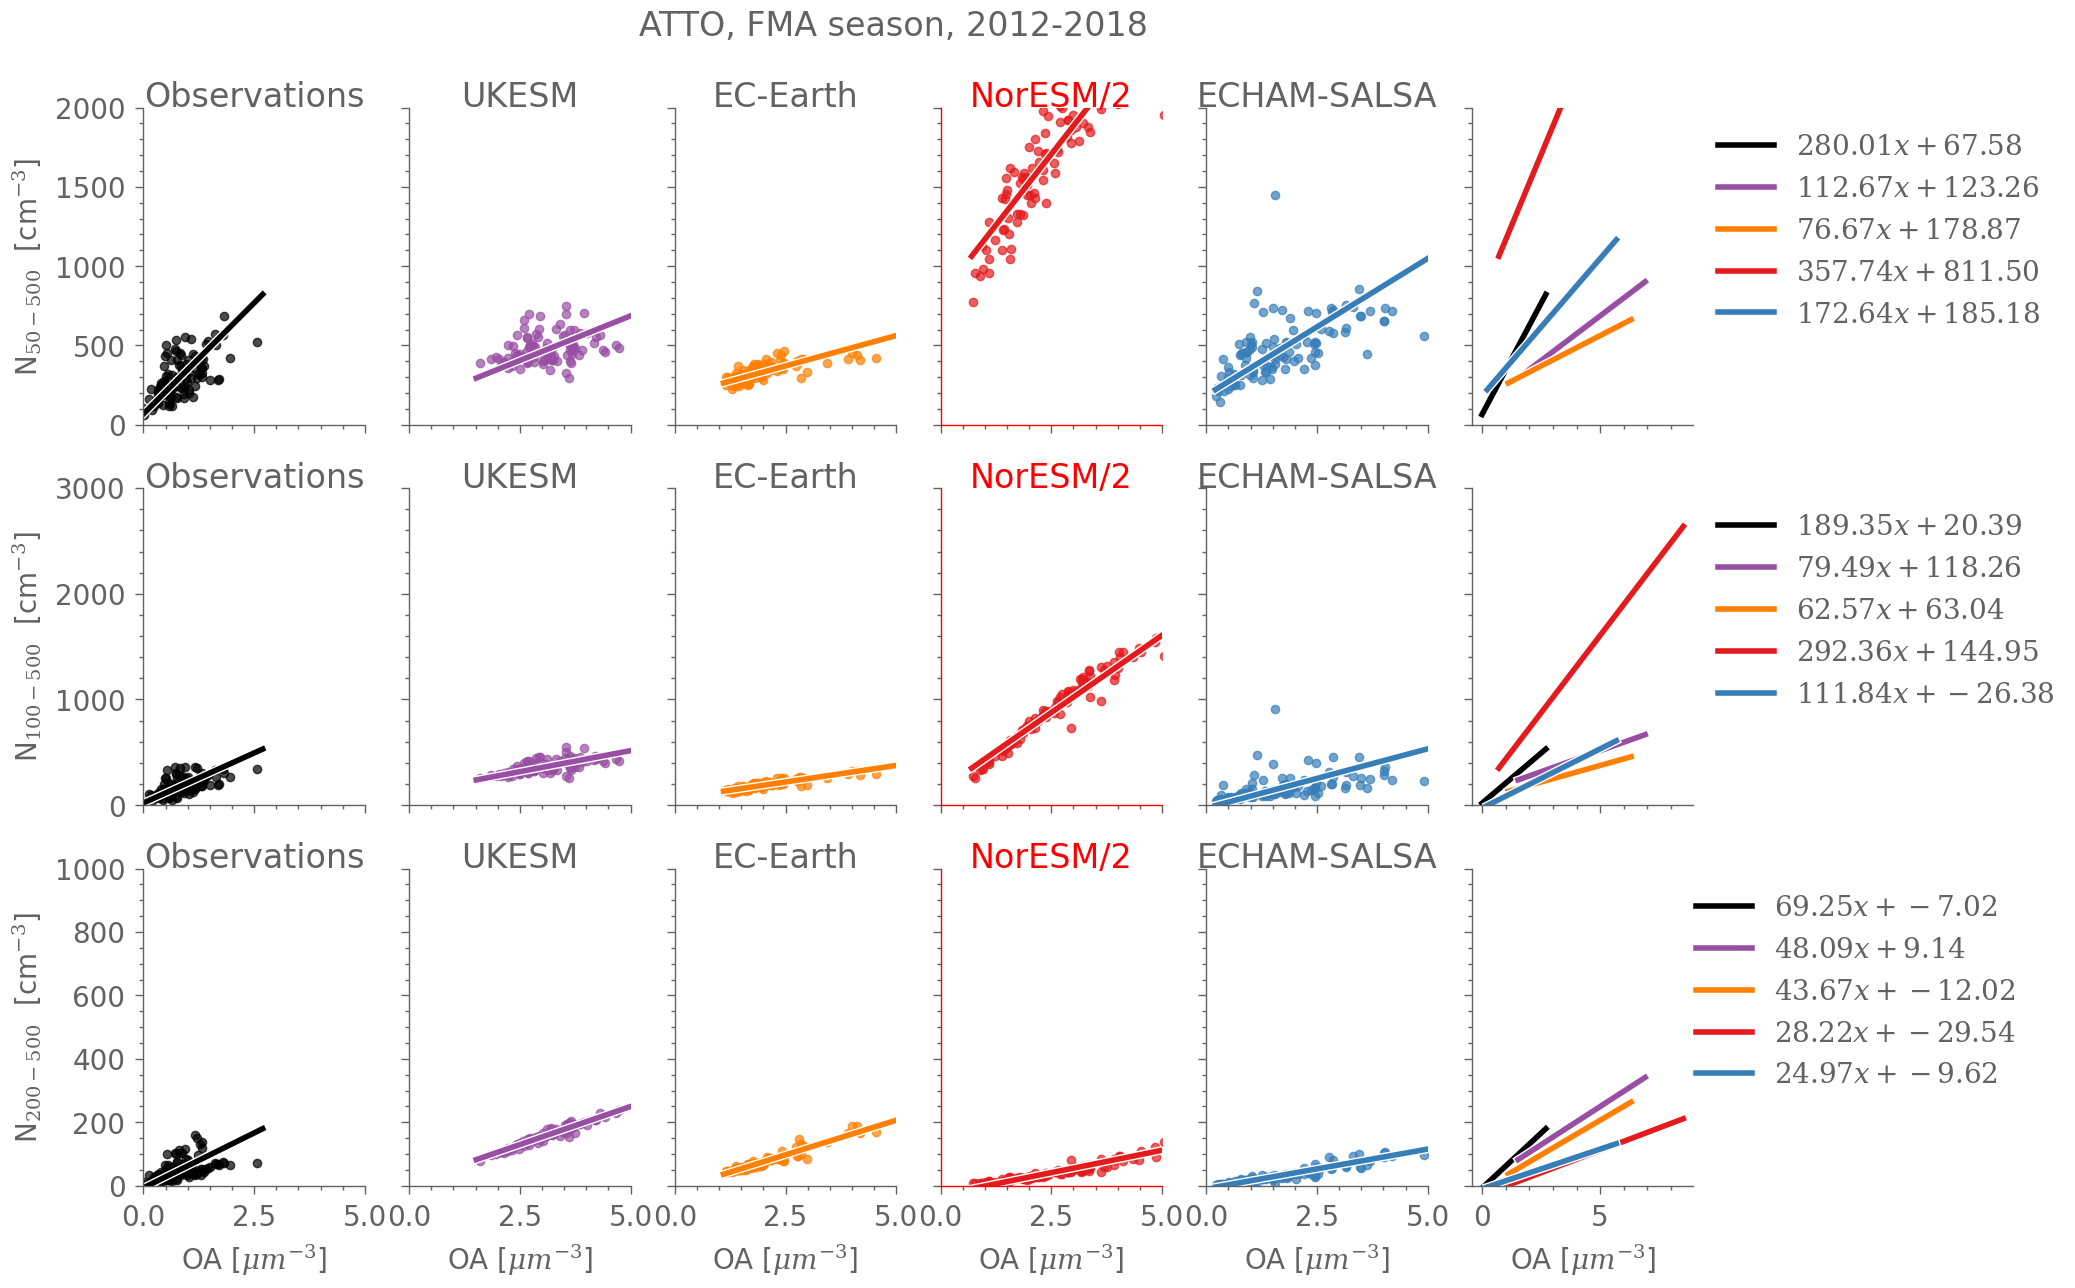

In [73]:
## Settings
alpha_scatt = 0.5
figsize=[10,7]
divide_NorESM_by_factor = 2
xlab = r'OA [$\mu m^{-3}$]'

season = 'FMA'
source_list = models_and_obs[::-1]

xlims = [0,5]

ylims = [0,2000]

# OBS: 
v_x = 'OA'

v_y = 'N50-500'
ylab = r'N$_{50-500}$  [cm$^{-3}$]'



xscale='linear'
yscale='linear'

fig, axs_all = plt.subplots(3,6,figsize=figsize, sharey='row', sharex='col')


## Settings
alpha_scatt = 0.6



# Make plot
axs_sub = axs_all[0,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list = source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
         )


for mo, ax in zip(source_list, axs_sub):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor

    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func, out = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func='linear',  #beta0 = [0,500],
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       
                                                       return_func=True, return_out_obj=True)
    
    
    compute_p_value(df_s, out, popt)

    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label=label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label=label)
    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

axs_sub[-1].legend(bbox_to_anchor=(1,1,), frameon=False)
#xlims = [.01,10]

ylims = [0,3000]

# OBS: 
v_y = 'N100-500'
ylab = r'N$_{100-500}$  [cm$^{-3}$]'

xscale='linear'
yscale='linear'
axs_sub = axs_all[1,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list =source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
           
         )
for mo, ax in zip(source_list, axs_sub):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor

    popt, pov, label, func, out = get_odr_fit_and_labs(df_s,v_x,v_y, beta0 = [0,500],
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       
                                                  fit_func='linear', return_func=True, return_out_obj=True)
    compute_p_value(df_s, out, popt)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label=label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label=label)

    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

    

    
axs_sub[-1].legend(bbox_to_anchor=(1,1,), frameon=False)
    
    
#xlims = [.01,10]

ylims = [0,1000]





# OBS: 
v_y = 'N200-500'
ylab = r'N$_{200-500}$  [cm$^{-3}$]'


xscale='linear'
yscale='linear'
axs_sub = axs_all[2,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list = source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
           
         )

for mo, ax in zip(source_list, axs_sub):
    print(mo)
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor
    
    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func, out = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', 
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       return_func=True, return_out_obj=True)
    compute_p_value(df_s, out, popt)
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label)

    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

leg = axs_sub[-1].legend(bbox_to_anchor=(.9,1,), frameon=False)

    
for ax in axs_sub:
    ax.set_xlabel(xlab)
sns.despine(fig) 



    
    
fn = make_fn_scat(f'together_{season}_linscale', v_x, 'Nx')
#ax.legend(frameon=False)
fig.savefig(fn, dpi=150, bbox_inches='tight')#)
fig.savefig(fn.with_suffix('.pdf'), dpi=150, bbox_inches='tight')#)
print(fn)

### FMAM

Observations
[254.61226807 113.21176077]
Beta: [317.65292536  50.95545121]
Beta Std Error: [17.33280785 19.94965177]
Beta Covariance: [[ 1493.58601673 -1475.0028352 ]
 [-1475.0028352   1978.62290785]]
Residual Variance: 0.20114424242304502
Inverse Condition #: 0.25285136380978984
Reason(s) for Halting:
  Sum of squares convergence
[317.65292536  50.95545121]
reason for halting
parameter: 317.65292536135274
   conf interval: 283.4011738993854 351.9046768233201
   tstat: 18.32668591159469
   pstat: 0.0

parameter: 50.955451208007794
   conf interval: 11.53249560101247 90.37840681500312
   tstat: 2.554202538938643
   pstat: 0.011653771808396218

UKESM
[ 76.94618322 277.78320383]
Beta: [171.81299056 -44.02057193]
Beta Std Error: [17.44431681 60.58608898]
Beta Covariance: [[  543.71947094 -1844.38596099]
 [-1844.38596099  6558.62486778]]
Residual Variance: 0.5596713108855835
Inverse Condition #: 0.05044565683798346
Reason(s) for Halting:
  Sum of squares convergence
[171.81299056 -44.020571

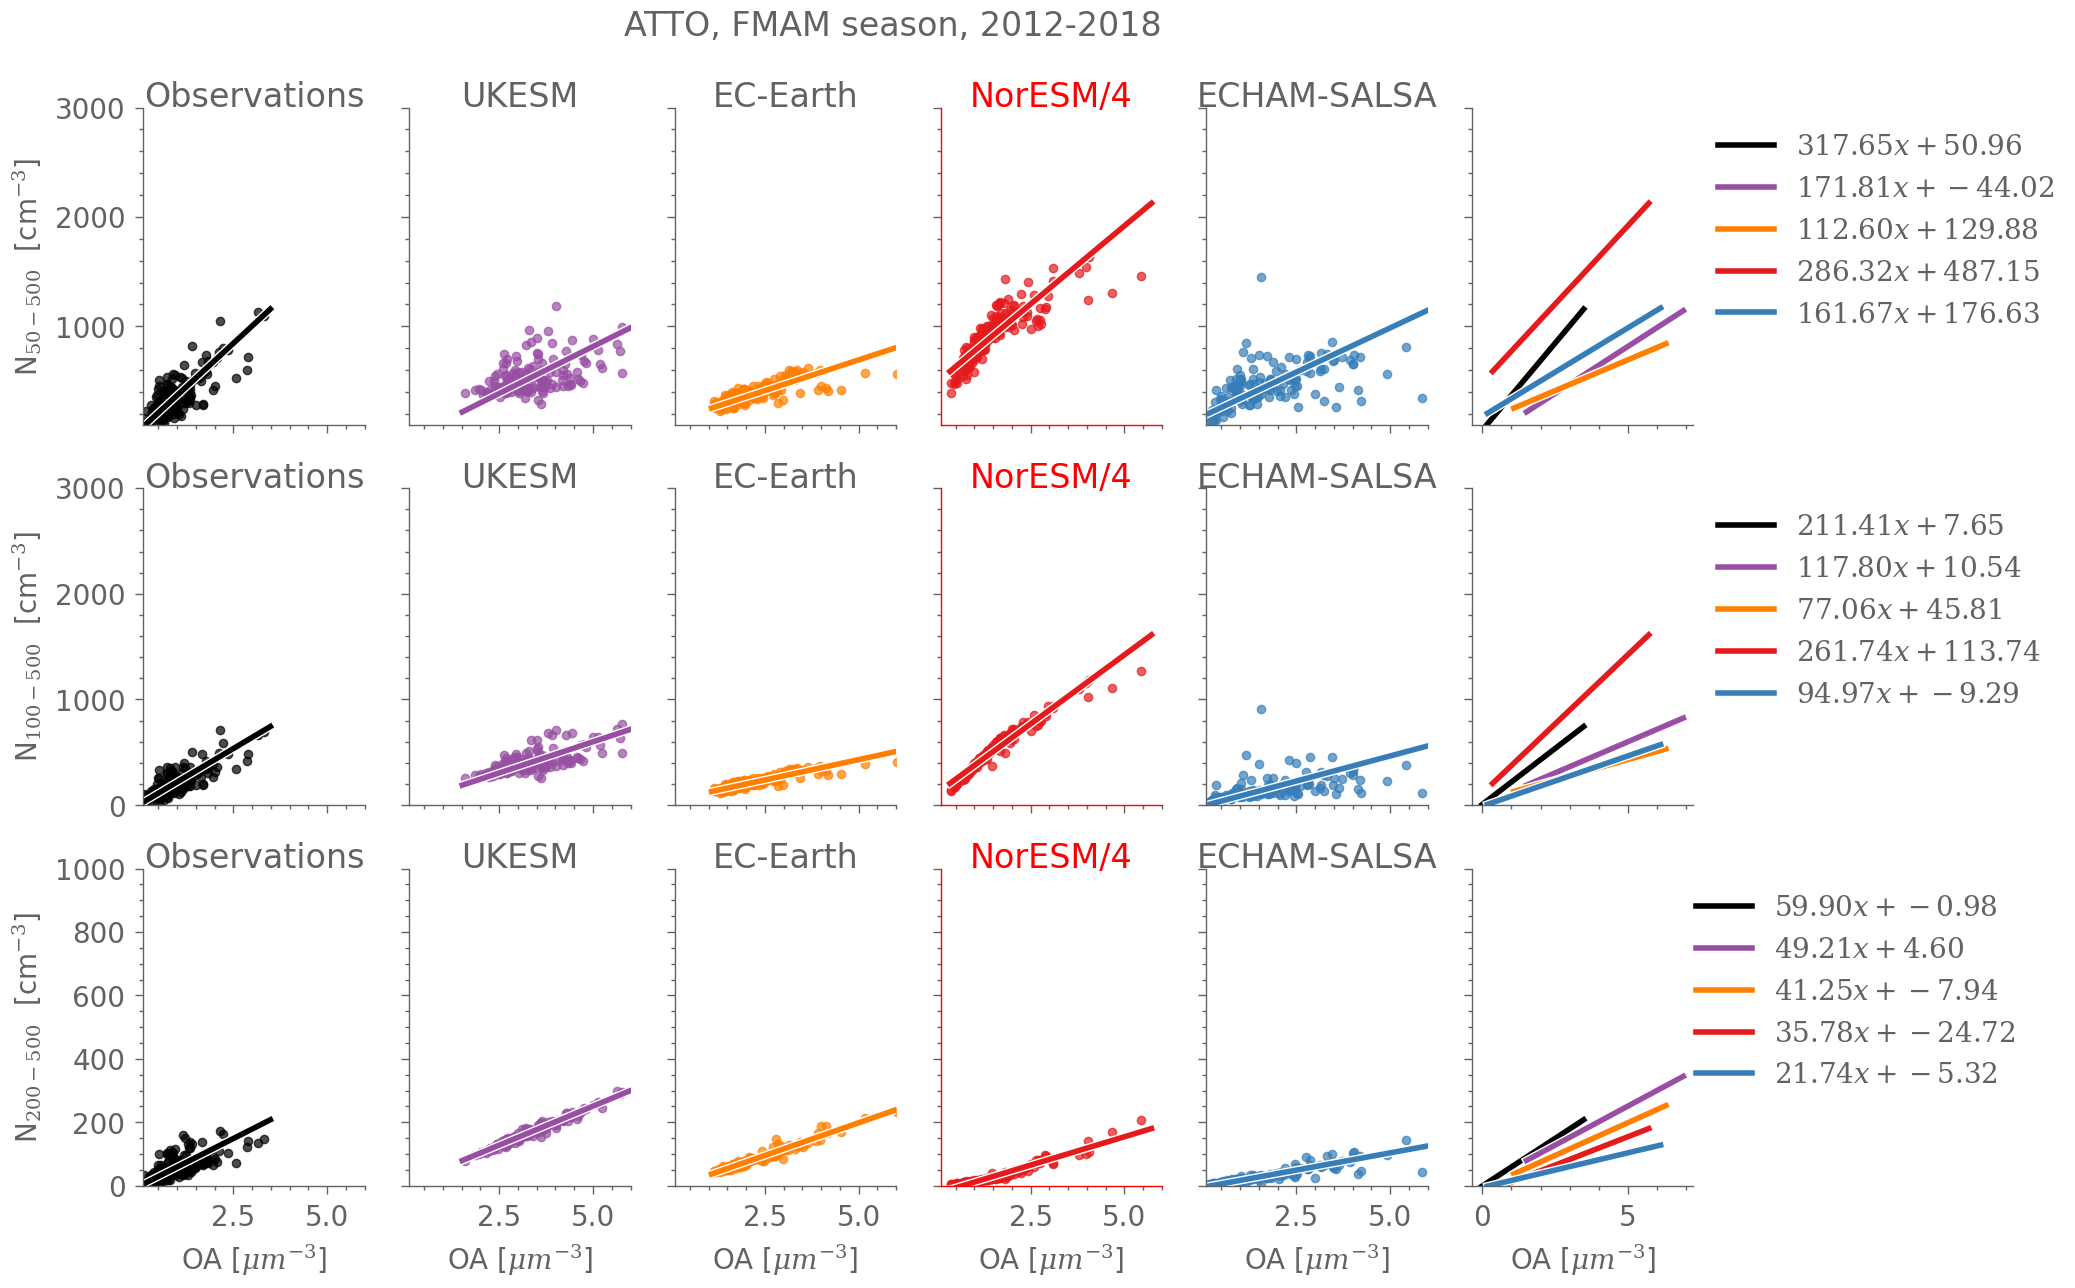

In [74]:
## Settings
alpha_scatt = 0.5
figsize=[10,7]
divide_NorESM_by_factor = 4
xlab = r'OA [$\mu m^{-3}$]'

season = 'FMAM'
source_list = models_and_obs[::-1]

xlims = [.1,6]

ylims = [100,3000]

# OBS: 
v_x = 'OA'

v_y = 'N50-500'
ylab = r'N$_{50-500}$  [cm$^{-3}$]'



xscale='linear'
yscale='linear'

fig, axs_all = plt.subplots(3,6,figsize=figsize, sharey='row', sharex='col')


## Settings
alpha_scatt = 0.6



# Make plot
axs_sub = axs_all[0,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list = source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
         )


for mo, ax in zip(source_list, axs_sub):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor

    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func, out = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func='linear',  #beta0 = [0,500],
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       
                                                       return_func=True, return_out_obj=True)
    
    
    compute_p_value(df_s, out, popt)

    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label=label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label=label)
    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

axs_sub[-1].legend(bbox_to_anchor=(1,1,), frameon=False)
#xlims = [.01,10]

ylims = [0,3000]

# OBS: 
v_y = 'N100-500'
ylab = r'N$_{100-500}$  [cm$^{-3}$]'

xscale='linear'
yscale='linear'
axs_sub = axs_all[1,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list =source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
           
         )
for mo, ax in zip(source_list, axs_sub):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor

    popt, pov, label, func, out = get_odr_fit_and_labs(df_s,v_x,v_y, beta0 = [0,500],
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       
                                                  fit_func='linear', return_func=True, return_out_obj=True)
    compute_p_value(df_s, out, popt)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label=label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label=label)

    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

    

    
axs_sub[-1].legend(bbox_to_anchor=(1,1,), frameon=False)
    
    
#xlims = [.01,10]

ylims = [0,1000]





# OBS: 
v_y = 'N200-500'
ylab = r'N$_{200-500}$  [cm$^{-3}$]'


xscale='linear'
yscale='linear'
axs_sub = axs_all[2,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list = source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
           
         )

for mo, ax in zip(source_list, axs_sub):
    print(mo)
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor
    
    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func, out = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', 
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       return_func=True, return_out_obj=True)
    compute_p_value(df_s, out, popt)
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label)

    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

leg = axs_sub[-1].legend(bbox_to_anchor=(.9,1,), frameon=False)

    
for ax in axs_sub:
    ax.set_xlabel(xlab)
sns.despine(fig) 



    
    
fn = make_fn_scat(f'together_{season}_linscale', v_x, 'Nx')
#ax.legend(frameon=False)
fig.savefig(fn, dpi=150, bbox_inches='tight')#)
fig.savefig(fn.with_suffix('.pdf'), dpi=150, bbox_inches='tight')#)
print(fn)

### MAM

Observations
[260.26180565 103.3352127 ]
Beta: [318.02545456  45.42889637]
Beta Std Error: [17.36664745 20.42152489]
Beta Covariance: [[ 1635.93647849 -1639.97671524]
 [-1639.97671524  2262.09477615]]
Residual Variance: 0.18435950757814704
Inverse Condition #: 0.25987116344874406
Reason(s) for Halting:
  Sum of squares convergence
[318.02545456  45.42889637]
reason for halting
parameter: 318.0254545557452
   conf interval: 283.67725190055916 352.3736572109313
   tstat: 18.31242647706111
   pstat: 0.0

parameter: 45.42889637429682
   conf interval: 5.03867841844113 85.8191143301525
   tstat: 2.2245594591240168
   pstat: 0.02778380687699178

UKESM
[ 95.58709341 227.05529833]
Beta: [189.15886724 -84.08838318]
Beta Std Error: [18.73586716 63.72672432]
Beta Covariance: [[  699.12705118 -2324.72900532]
 [-2324.72900532  8088.19661931]]
Residual Variance: 0.5021014675332925
Inverse Condition #: 0.05023976229258977
Reason(s) for Halting:
  Sum of squares convergence
[189.15886724 -84.08838318]

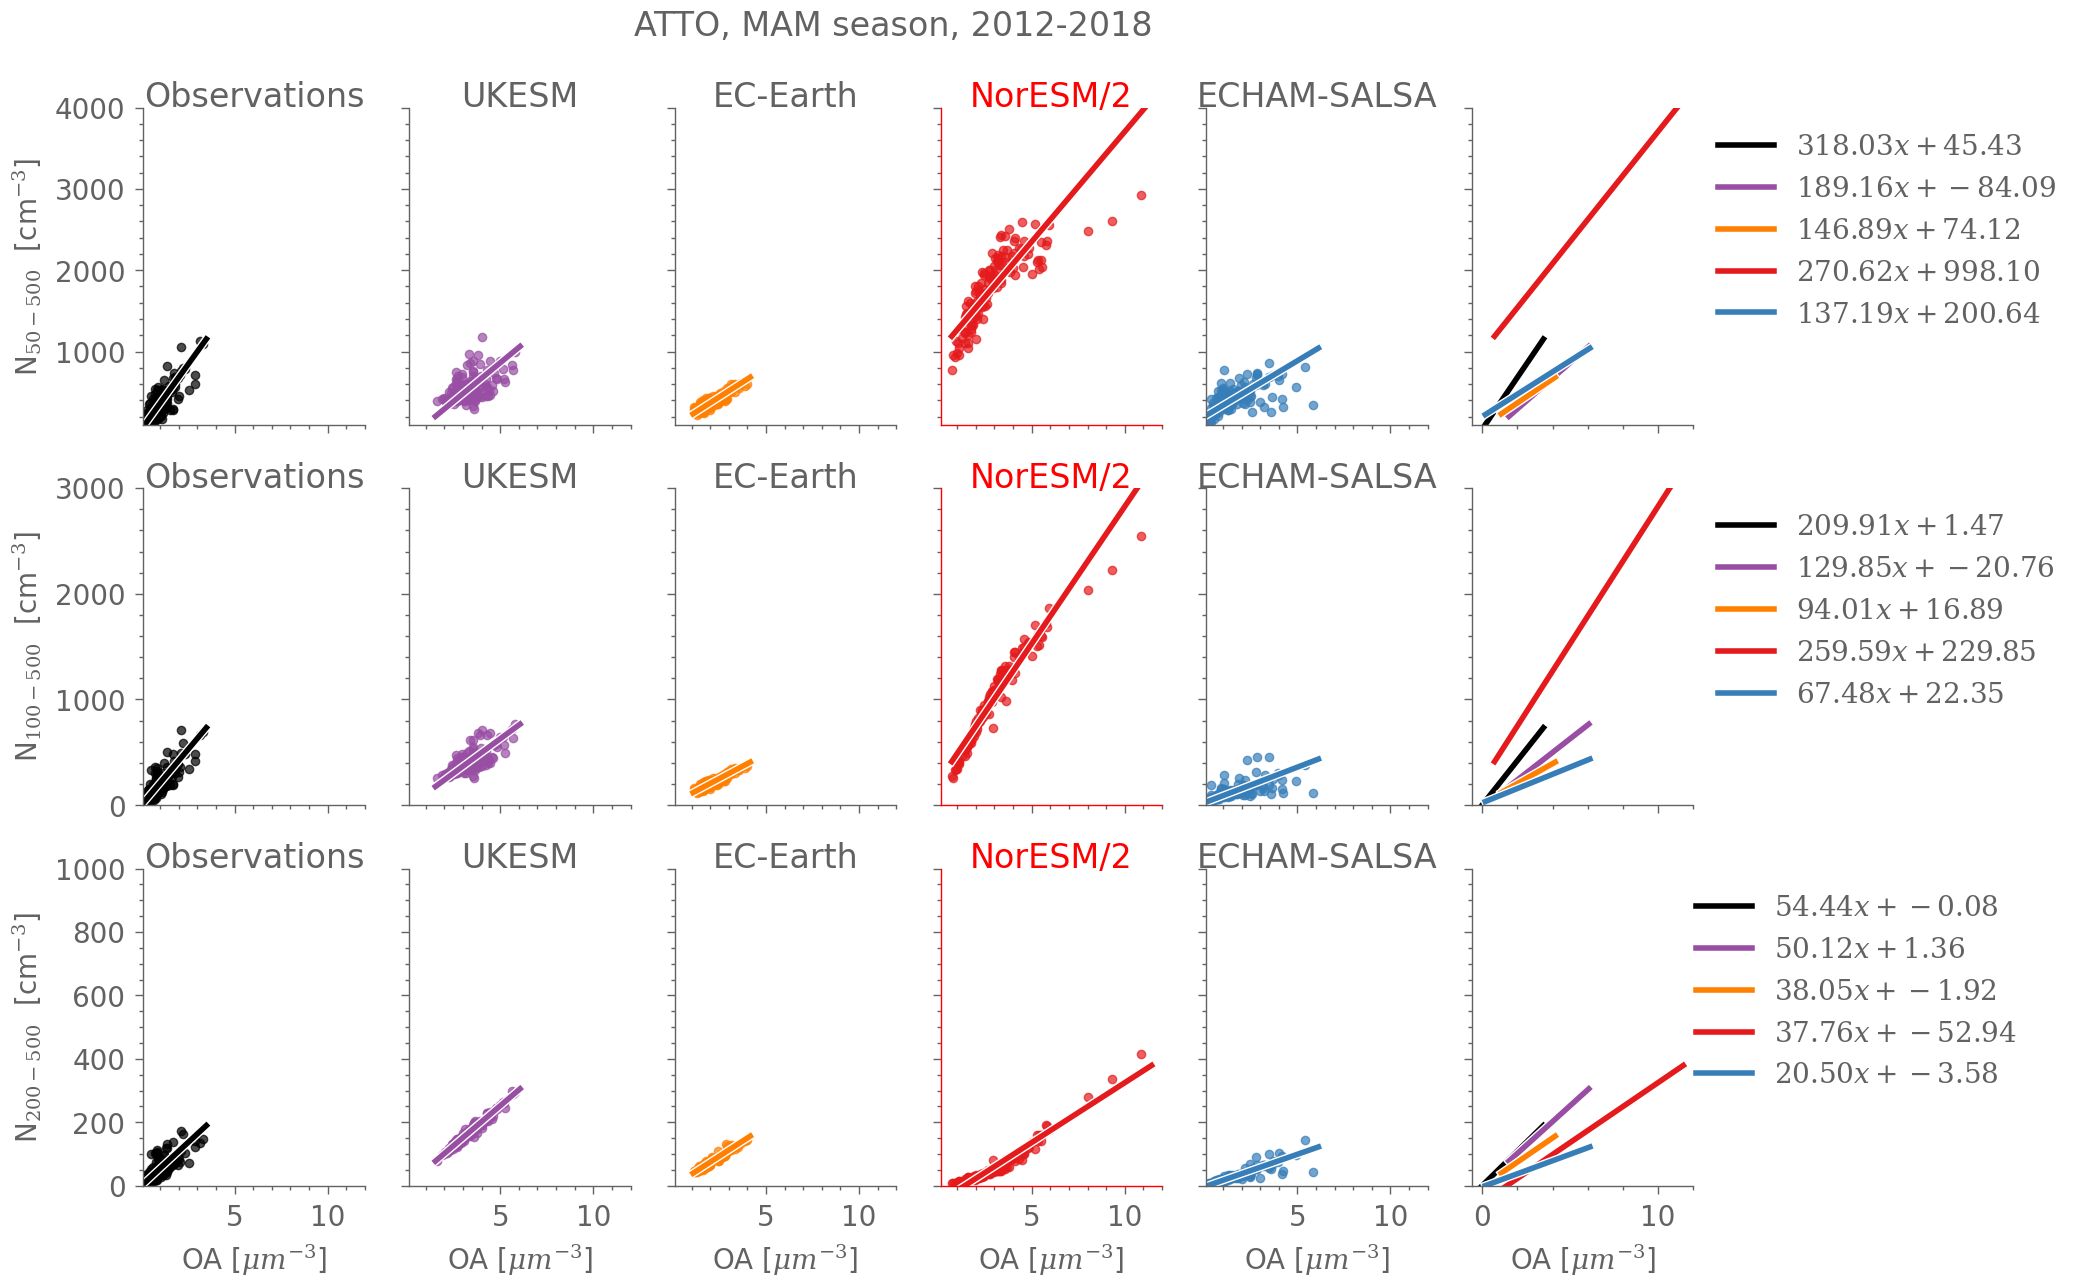

In [75]:
## Settings
alpha_scatt = 0.5
figsize=[10,7]
divide_NorESM_by_factor = 2
xlab = r'OA [$\mu m^{-3}$]'

season = 'MAM'
source_list = models_and_obs[::-1]

xlims = [.1,12]

ylims = [100,4000]

# OBS: 
v_x = 'OA'

v_y = 'N50-500'
ylab = r'N$_{50-500}$  [cm$^{-3}$]'



xscale='linear'
yscale='linear'

fig, axs_all = plt.subplots(3,6,figsize=figsize, sharey='row', sharex='col')


## Settings
alpha_scatt = 0.6



# Make plot
axs_sub = axs_all[0,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list = source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
         )


for mo, ax in zip(source_list, axs_sub):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor

    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func, out = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func='linear',  #beta0 = [0,500],
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       
                                                       return_func=True, return_out_obj=True)
    
    
    compute_p_value(df_s, out, popt)

    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label=label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label=label)
    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

axs_sub[-1].legend(bbox_to_anchor=(1,1,), frameon=False)
#xlims = [.01,10]

ylims = [0,3000]

# OBS: 
v_y = 'N100-500'
ylab = r'N$_{100-500}$  [cm$^{-3}$]'

xscale='linear'
yscale='linear'
axs_sub = axs_all[1,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list =source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
           
         )
for mo, ax in zip(source_list, axs_sub):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor

    popt, pov, label, func, out = get_odr_fit_and_labs(df_s,v_x,v_y, beta0 = [0,500],
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       
                                                  fit_func='linear', return_func=True, return_out_obj=True)
    compute_p_value(df_s, out, popt)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label=label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label=label)

    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

    

    
axs_sub[-1].legend(bbox_to_anchor=(1,1,), frameon=False)
    
    
#xlims = [.01,10]

ylims = [0,1000]





# OBS: 
v_y = 'N200-500'
ylab = r'N$_{200-500}$  [cm$^{-3}$]'


xscale='linear'
yscale='linear'
axs_sub = axs_all[2,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list = source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
           
         )

for mo, ax in zip(source_list, axs_sub):
    print(mo)
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor
    
    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func, out = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', 
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       return_func=True, return_out_obj=True)
    compute_p_value(df_s, out, popt)
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label)

    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

leg = axs_sub[-1].legend(bbox_to_anchor=(.9,1,), frameon=False)

    
for ax in axs_sub:
    ax.set_xlabel(xlab)
sns.despine(fig) 



    
    
fn = make_fn_scat(f'together_{season}_linscale', v_x, 'Nx')
#ax.legend(frameon=False)
fig.savefig(fn, dpi=150, bbox_inches='tight')#)
fig.savefig(fn.with_suffix('.pdf'), dpi=150, bbox_inches='tight')#)
print(fn)

### JFM

Observations
[342.18596523  83.6953045 ]
Beta: [357.37422194  64.10179194]
Beta Std Error: [11.63032484 22.5410215 ]
Beta Covariance: [[ 3106.88577237 -4008.01807547]
 [-4008.01807547 11670.48172866]]
Residual Variance: 0.043536990350586606
Inverse Condition #: 0.3407819091605916
Reason(s) for Halting:
  Sum of squares convergence
[357.37422194  64.10179194]
reason for halting
parameter: 357.3742219436983
   conf interval: 334.23780091557137 380.5106429718252
   tstat: 30.72779366433459
   pstat: 0.0

parameter: 64.1017919403544
   conf interval: 19.260519571747338 108.94306430896147
   tstat: 2.8437838068378434
   pstat: 0.005626408672655181

UKESM
[ 37.8669827  339.75337678]
Beta: [ 63.92729787 260.12640725]
Beta Std Error: [ 7.14426174 22.4912587 ]
Beta Covariance: [[ 122.21497528 -373.42633436]
 [-373.42633436 1211.25959784]]
Residual Variance: 0.4176286559023398
Inverse Condition #: 0.061683873966751304
Reason(s) for Halting:
  Sum of squares convergence
[ 63.92729787 260.12640725

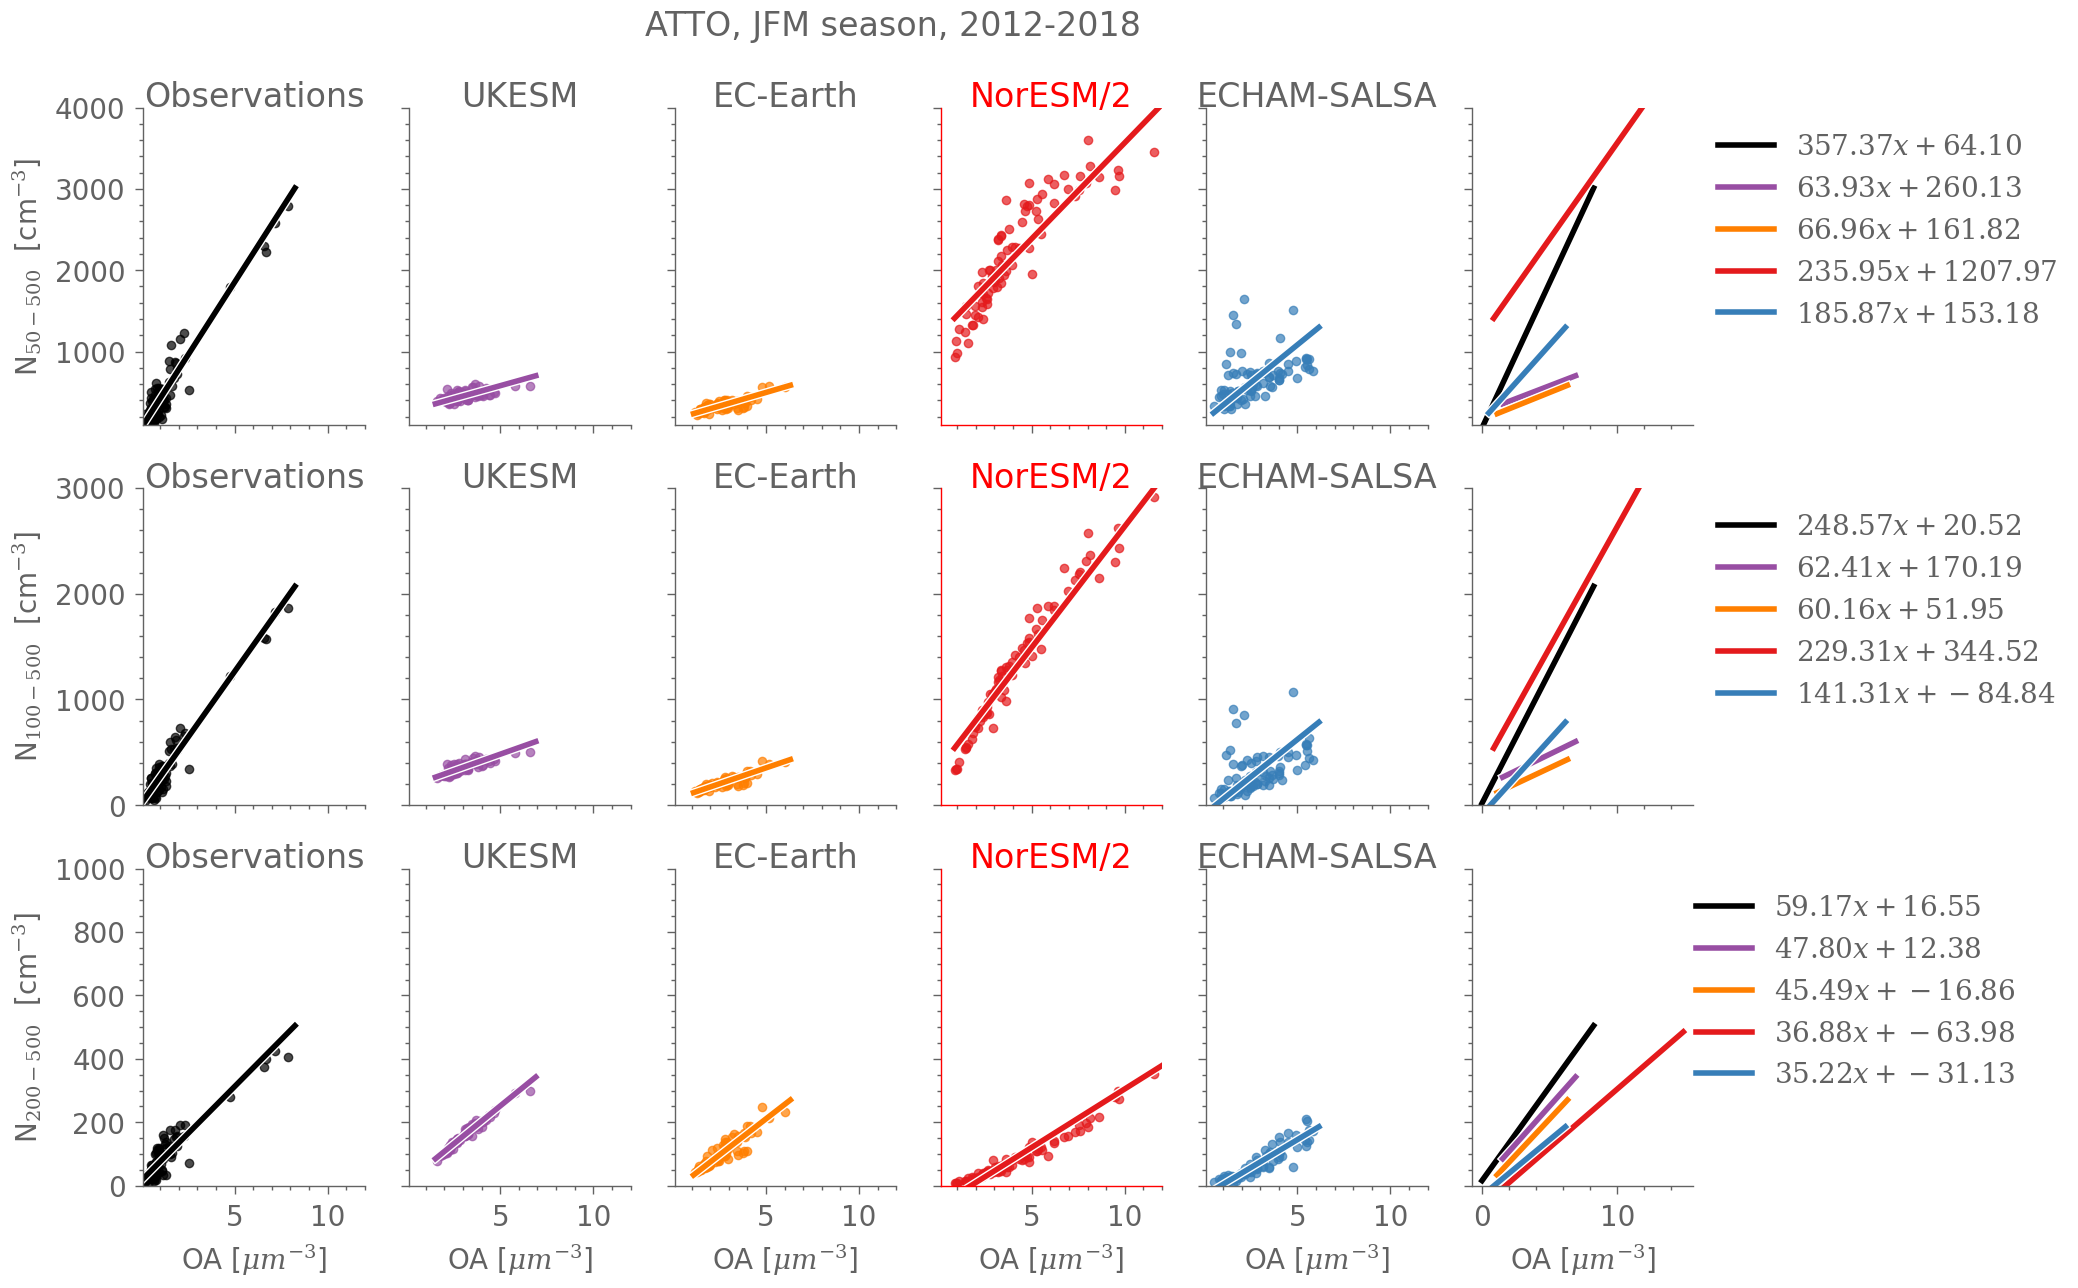

In [76]:
## Settings
alpha_scatt = 0.5
figsize=[10,7]
divide_NorESM_by_factor = 2
xlab = r'OA [$\mu m^{-3}$]'

season = 'JFM'
source_list = models_and_obs[::-1]

xlims = [.1,12]

ylims = [100,4000]

# OBS: 
v_x = 'OA'

v_y = 'N50-500'
ylab = r'N$_{50-500}$  [cm$^{-3}$]'



xscale='linear'
yscale='linear'

fig, axs_all = plt.subplots(3,6,figsize=figsize, sharey='row', sharex='col')


## Settings
alpha_scatt = 0.6



# Make plot
axs_sub = axs_all[0,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list = source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
         )


for mo, ax in zip(source_list, axs_sub):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor

    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func, out = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func='linear',  #beta0 = [0,500],
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       
                                                       return_func=True, return_out_obj=True)
    
    
    compute_p_value(df_s, out, popt)

    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label=label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label=label)
    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

axs_sub[-1].legend(bbox_to_anchor=(1,1,), frameon=False)
#xlims = [.01,10]

ylims = [0,3000]

# OBS: 
v_y = 'N100-500'
ylab = r'N$_{100-500}$  [cm$^{-3}$]'

xscale='linear'
yscale='linear'
axs_sub = axs_all[1,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list =source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
           
         )
for mo, ax in zip(source_list, axs_sub):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor

    popt, pov, label, func, out = get_odr_fit_and_labs(df_s,v_x,v_y, beta0 = [0,500],
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       
                                                  fit_func='linear', return_func=True, return_out_obj=True)
    compute_p_value(df_s, out, popt)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label=label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label=label)

    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

    

    
axs_sub[-1].legend(bbox_to_anchor=(1,1,), frameon=False)
    
    
#xlims = [.01,10]

ylims = [0,1000]





# OBS: 
v_y = 'N200-500'
ylab = r'N$_{200-500}$  [cm$^{-3}$]'


xscale='linear'
yscale='linear'
axs_sub = axs_all[2,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list = source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
           
         )

for mo, ax in zip(source_list, axs_sub):
    print(mo)
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor
    
    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func, out = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', 
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       return_func=True, return_out_obj=True)
    compute_p_value(df_s, out, popt)
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label)

    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

leg = axs_sub[-1].legend(bbox_to_anchor=(.9,1,), frameon=False)

    
for ax in axs_sub:
    ax.set_xlabel(xlab)
sns.despine(fig) 



    
    
fn = make_fn_scat(f'together_{season}_linscale', v_x, 'Nx')
#ax.legend(frameon=False)
fig.savefig(fn, dpi=150, bbox_inches='tight')#)
fig.savefig(fn.with_suffix('.pdf'), dpi=150, bbox_inches='tight')#)
print(fn)

In [77]:
from scipy import odr

### SON

Observations
[170.60993922 862.57161936]
Beta: [311.47866412 289.15775287]
Beta Std Error: [ 30.00065392 132.57861452]
Beta Covariance: [[ 1958.90895718 -7973.84699069]
 [-7973.84699069 38256.01792648]]
Residual Variance: 0.4594594518813001
Inverse Condition #: 0.07780044093242519
Reason(s) for Halting:
  Sum of squares convergence
[311.47866412 289.15775287]
reason for halting
parameter: 311.4786641241715
   conf interval: 252.10825197267354 370.8490762756694
   tstat: 10.382395828226688
   pstat: 0.0

parameter: 289.157752871605
   conf interval: 26.788572289808485 551.5269334534015
   tstat: 2.1810286215589194
   pstat: 0.031038076743706844

UKESM
[ 49.61352794 415.14324256]
Beta: [ 72.21066021 288.80563785]
Beta Std Error: [ 5.56350626 32.16129995]
Beta Covariance: [[  97.34878141 -544.26426832]
 [-544.26426832 3253.12346582]]
Residual Variance: 0.31795572019725615
Inverse Condition #: 0.03903501574870103
Reason(s) for Halting:
  Sum of squares convergence
[ 72.21066021 288.8056378

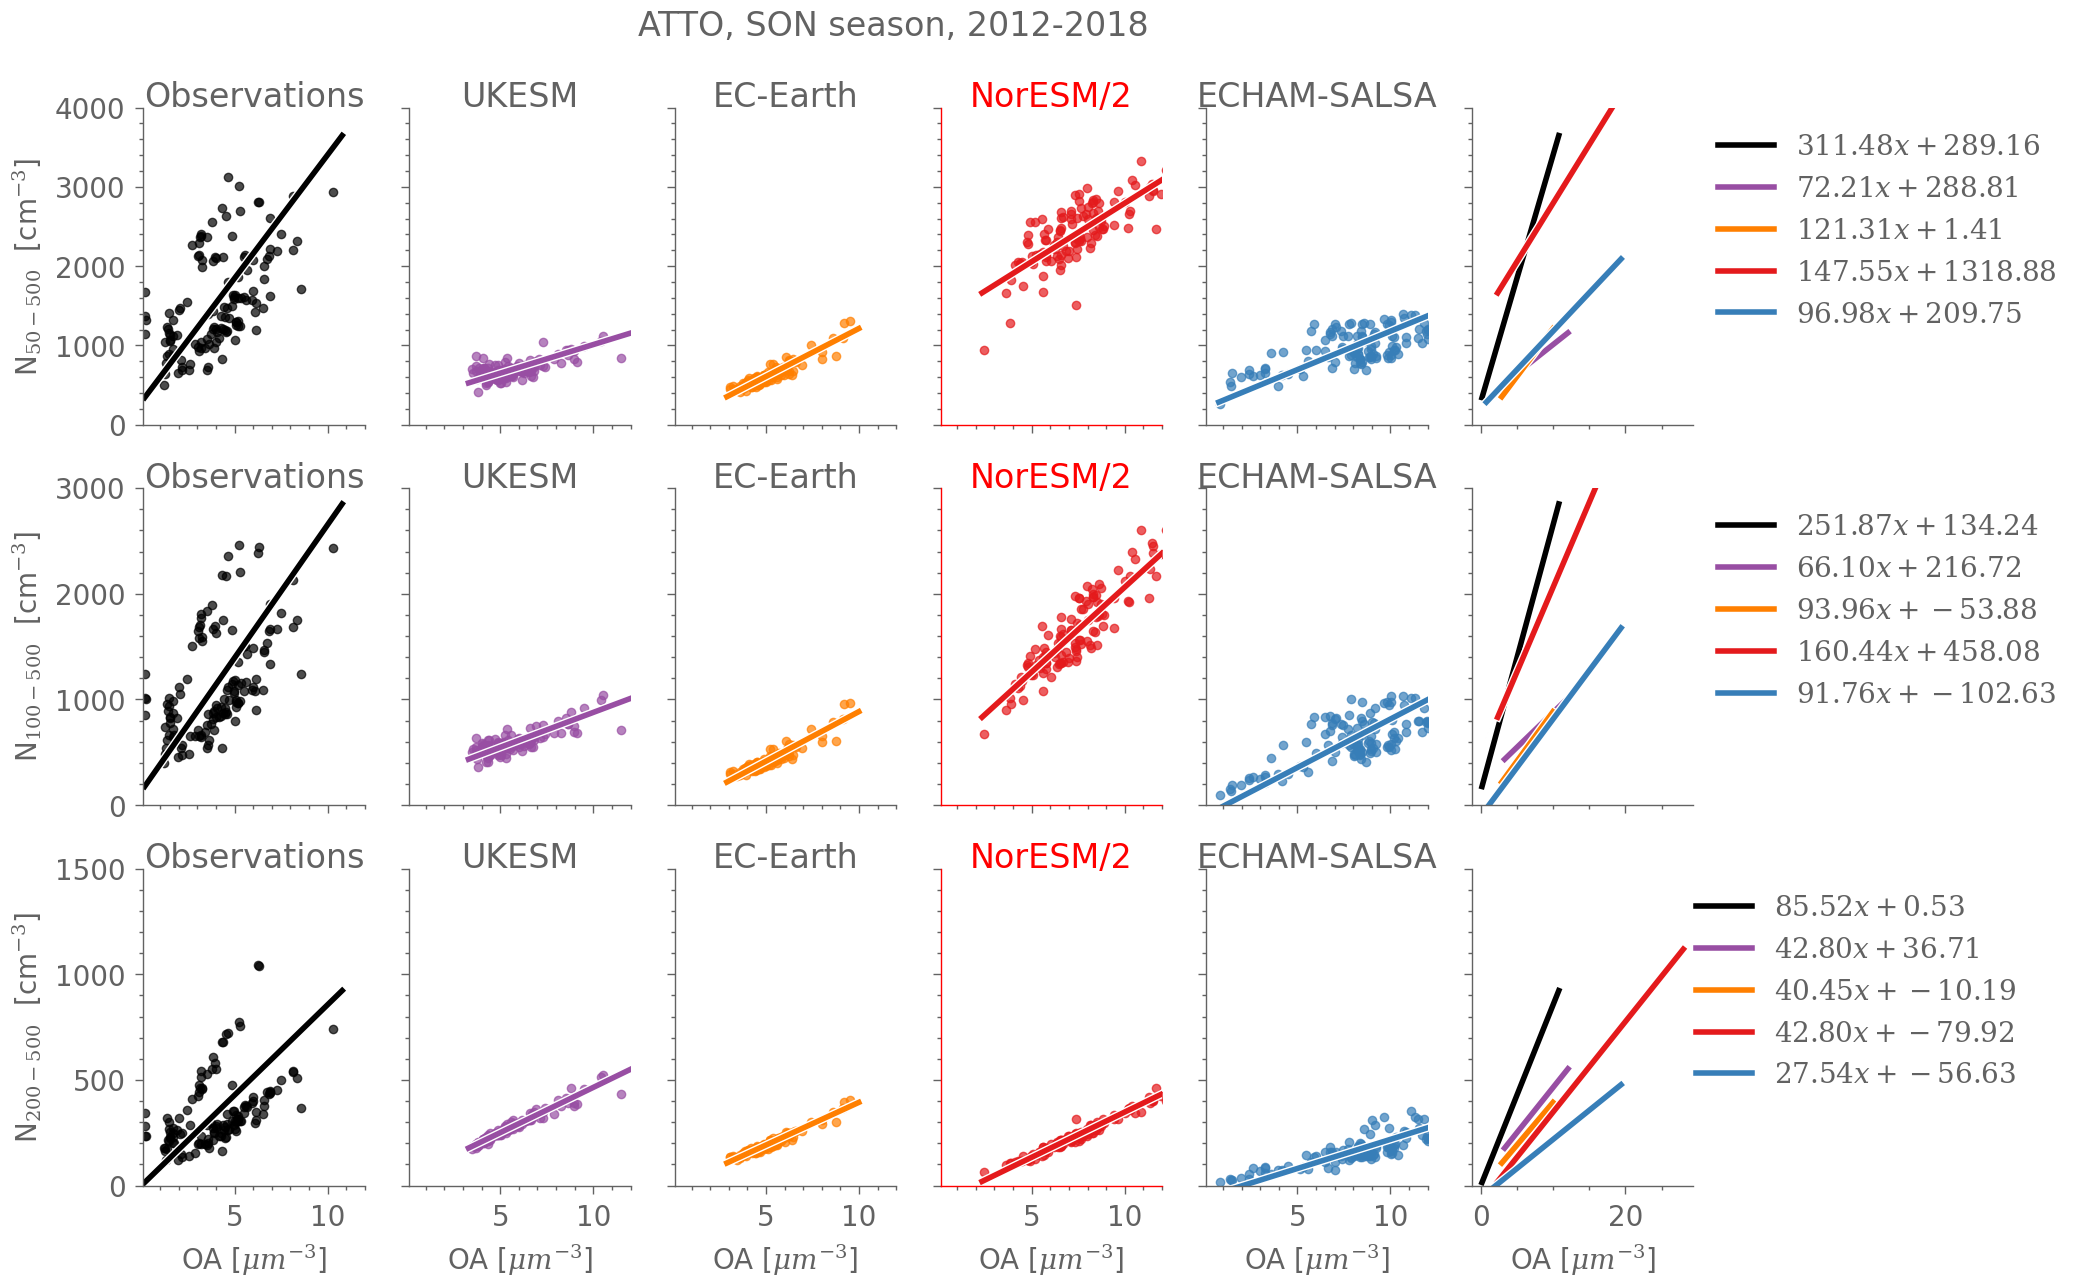

In [78]:
## Settings
alpha_scatt = 0.5
figsize=[10,7]
divide_NorESM_by_factor = 2
xlab = r'OA [$\mu m^{-3}$]'

season = 'SON'
source_list = models_and_obs[::-1]

xlims = [.1,12]

ylims = [0,4000]

# OBS: 
v_x = 'OA'

v_y = 'N50-500'
ylab = r'N$_{50-500}$  [cm$^{-3}$]'



xscale='linear'
yscale='linear'

fig, axs_all = plt.subplots(3,6,figsize=figsize, sharey='row', sharex='col')


## Settings
alpha_scatt = 0.6



# Make plot
axs_sub = axs_all[0,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list = source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
         )


for mo, ax in zip(source_list, axs_sub):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor

    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func, out = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func='linear',  #beta0 = [0,500],
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       
                                                       return_func=True, return_out_obj=True)
    
    
    compute_p_value(df_s, out, popt)

    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label=label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label=label)
    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

axs_sub[-1].legend(bbox_to_anchor=(1,1,), frameon=False)
#xlims = [.01,10]

ylims = [0,3000]

# OBS: 
v_y = 'N100-500'
ylab = r'N$_{100-500}$  [cm$^{-3}$]'

xscale='linear'
yscale='linear'
axs_sub = axs_all[1,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list =source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
           
         )
for mo, ax in zip(source_list, axs_sub):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor

    popt, pov, label, func, out = get_odr_fit_and_labs(df_s,v_x,v_y, beta0 = [0,500],
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       
                                                  fit_func='linear', return_func=True, return_out_obj=True)
    compute_p_value(df_s, out, popt)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label=label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label=label)

    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

    

    
axs_sub[-1].legend(bbox_to_anchor=(1,1,), frameon=False)
    
    
#xlims = [.01,10]

ylims = [0,1500]





# OBS: 
v_y = 'N200-500'
ylab = r'N$_{200-500}$  [cm$^{-3}$]'


xscale='linear'
yscale='linear'
axs_sub = axs_all[2,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list = source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
           
         )

for mo, ax in zip(source_list, axs_sub):
    print(mo)
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor
    
    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func, out = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', 
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       return_func=True, return_out_obj=True)
    compute_p_value(df_s, out, popt)
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label)

    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

leg = axs_sub[-1].legend(bbox_to_anchor=(.9,1,), frameon=False)

    
for ax in axs_sub:
    ax.set_xlabel(xlab)
sns.despine(fig) 



    
    
fn = make_fn_scat(f'together_{season}_linscale', v_x, 'Nx')
#ax.legend(frameon=False)
fig.savefig(fn, dpi=150, bbox_inches='tight')#)
fig.savefig(fn.with_suffix('.pdf'), dpi=150, bbox_inches='tight')#)
print(fn)

### N50

#### DJF

#### JFM

#### WET_old

## Extra stuff

<AxesSubplot:xlabel='time'>

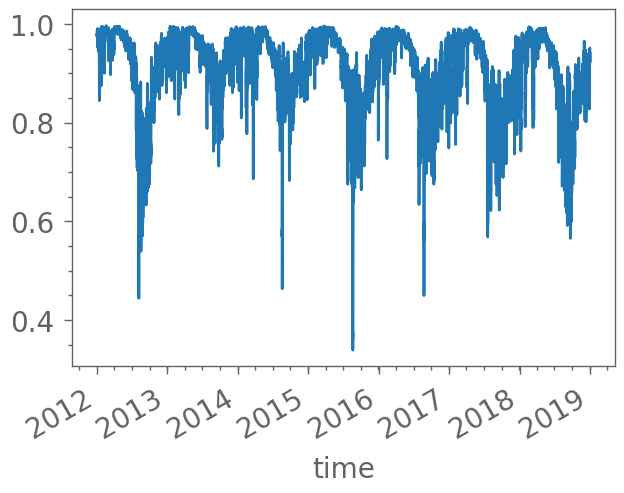

In [79]:
mo= 'NorESM'
ca = list(dic_df_mod_case[mo].keys())[0]
df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]

(df_s['SOA']/df_s['OA']).plot()

<AxesSubplot:xlabel='time'>

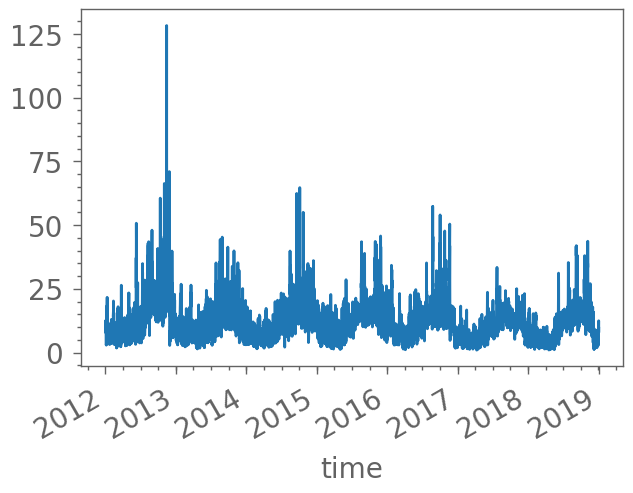

In [80]:
mo= 'NorESM'
ca = list(dic_df_mod_case[mo].keys())[0]

df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]

(df_s['OA']).plot()

<AxesSubplot:xlabel='time'>

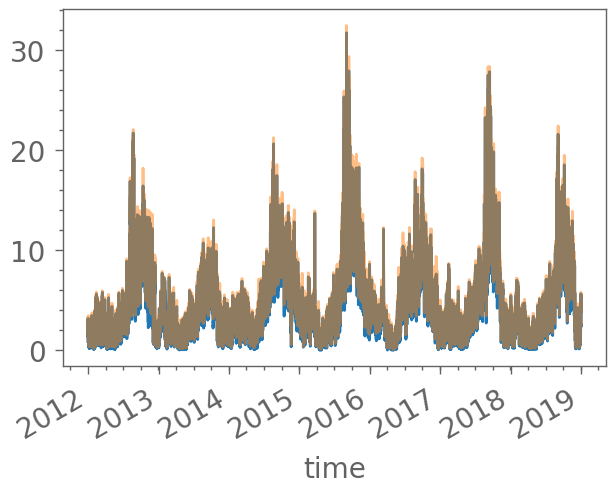

In [81]:
mo= 'ECHAM-SALSA'
ca = list(dic_df_mod_case[mo].keys())[0]

df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]

#(df_s['SOA']/df_s['OA']).plot()

df_s['OA'].plot()
df_s['OAG'].plot(alpha=.5)

<AxesSubplot:xlabel='time'>

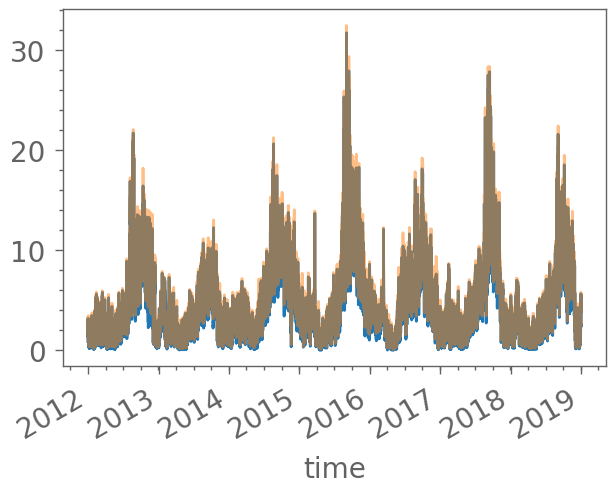

In [82]:
mo= 'ECHAM-SALSA'
ca = list(dic_df_mod_case[mo].keys())[0]

df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]

#(df_s['SOA']/df_s['OA']).plot()

df_s['OA'].plot()
df_s['OAG'].plot(alpha=.5)

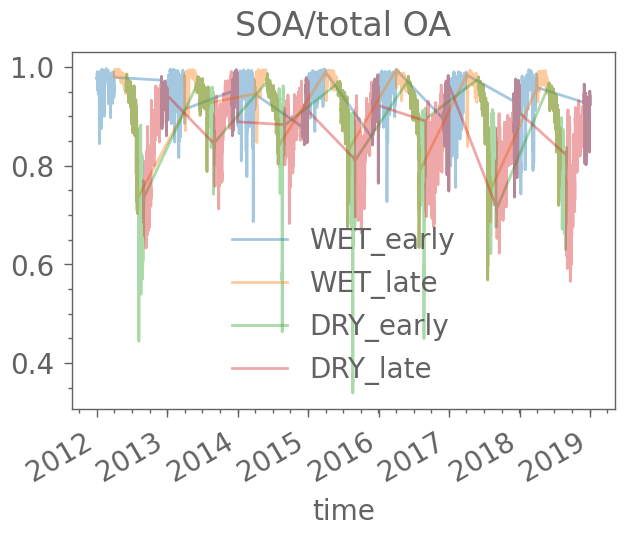

In [83]:
mo= 'NorESM'
ca = list(dic_df_mod_case[mo].keys())[0]

df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]




seas = 'WET_early'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['SOA']/_df['OA']).plot(label=seas, alpha=.4)


seas = 'WET_late'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['SOA']/_df['OA']).plot(label=seas, alpha=.4)


seas = 'DRY_early'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['SOA']/_df['OA']).plot(label=seas, alpha=.4)


seas = 'DRY_late'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['SOA']/_df['OA']).plot(label=seas, alpha=.4)

plt.title('SOA/total OA')
plt.legend()

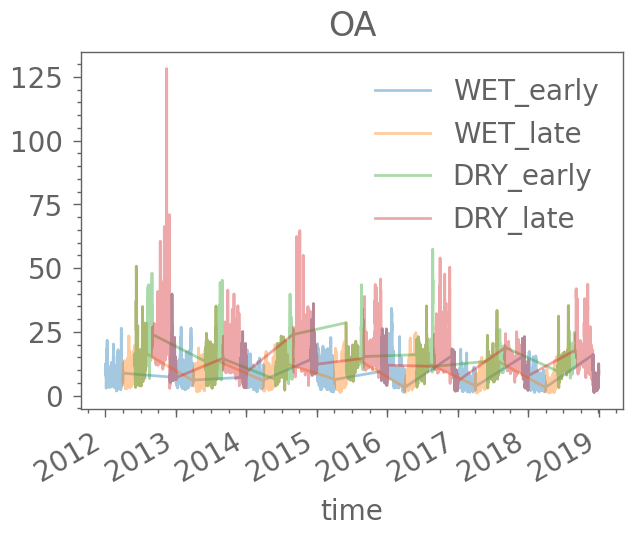

In [84]:
mo= 'NorESM'
ca = list(dic_df_mod_case[mo].keys())[0]

df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]




seas = 'WET_early'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['OA']).plot(label=seas, alpha=.4)


seas = 'WET_late'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['OA']).plot(label=seas, alpha=.4)


seas = 'DRY_early'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['OA']).plot(label=seas, alpha=.4)


seas = 'DRY_late'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['OA']).plot(label=seas, alpha=.4)
plt.title('OA')

plt.legend()

Text(0.5, 1.0, 'SOA')

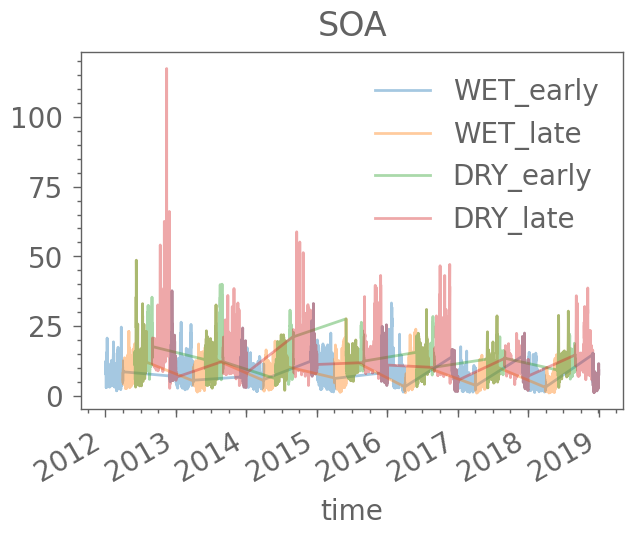

In [85]:
mo= 'NorESM'
ca = list(dic_df_mod_case[mo].keys())[0]

df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]




seas = 'WET_early'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['SOA']).plot(label=seas, alpha=.4)


seas = 'WET_late'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['SOA']).plot(label=seas, alpha=.4)


seas = 'DRY_early'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['SOA']).plot(label=seas, alpha=.4)


seas = 'DRY_late'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['SOA']).plot(label=seas, alpha=.4)


plt.legend()
plt.title('SOA')

<AxesSubplot:xlabel='time'>

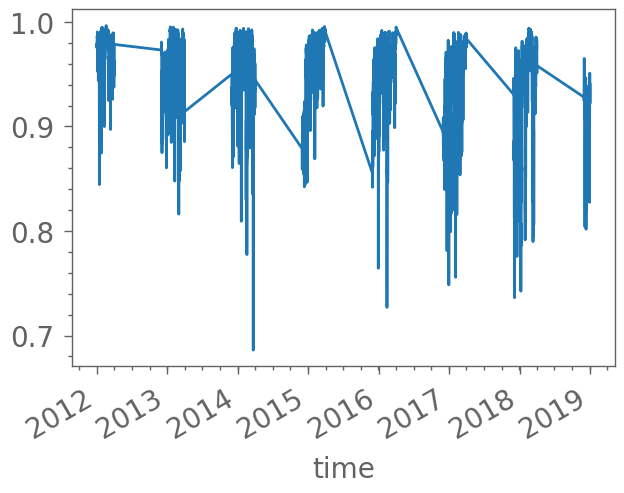

In [86]:
month_ma = select_months(df_s, season='WET_early')

_df = df_s[month_ma]
(_df['SOA']/_df['OA']).plot()

<AxesSubplot:xlabel='time'>

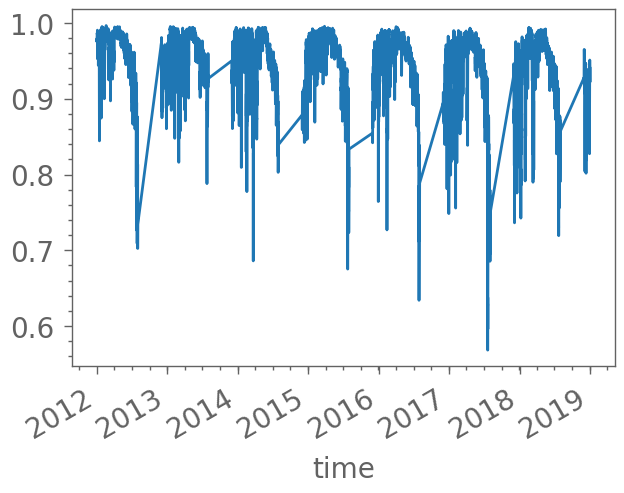

In [87]:
month_ma = select_months(df_s, season='WET')

_df = df_s[month_ma]
(_df['SOA']/_df['OA']).plot()

<AxesSubplot:xlabel='time'>

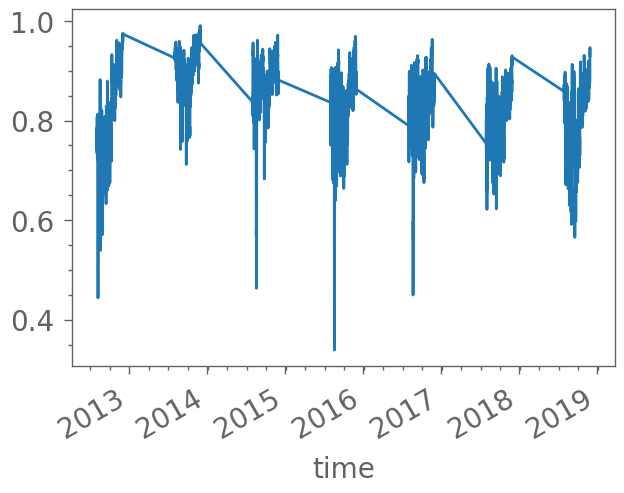

In [88]:
month_ma = select_months(df_s, season='DRY')

_df = df_s[month_ma]
(_df['SOA']/_df['OA']).plot()